In [17]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from prettytable import PrettyTable
import seaborn as sns
import random
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn import svm, neighbors, naive_bayes, tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from itertools import permutations
import random

In [107]:
import glob



featureNames = []
for i in range(1024):
    featureNames.append("F"+str(i))

data = pd.DataFrame(columns=["Filename"] + featureNames)

for filepath in glob.iglob('data-10/*.csv'):
    filename = filepath[8:len(filepath)-4]
    
    df = pd.read_csv(filepath, header=None)
    df.columns = featureNames
    df["Filename"] = filename
    data = pd.concat([data, df])
    
    
data = data.reset_index(drop=True)
    

In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing



In [19]:
k=1000
i = 0
featuresRand = []
while (i < k):
    #Randomly chooses from T_Healthy with replacement
    u = np.random.choice(featureNames, size=5, replace=True)
    featuresRand.append(u)
    i+=1


In [108]:
train = pd.read_csv("train.csv")

In [109]:
train = train.sort_values(by=["unique_id"]).reset_index(drop=True)

In [22]:
print(train.head(n=20))

    Unnamed: 0  unique_id  class
0          262  ABNTSS552      4
1           83  ADQRPH513      3
2          108  AEEEIG737      3
3          140  AFEOPC672      3
4          372  AGHXWX765      0
5          321  ALVEND616      3
6          113  ANXAVZ367      3
7          353  AQITMA707      0
8          424  ASSDSL378      2
9            6  ATFCXQ176      4
10          62  ATXDJZ336      4
11          74  AWTDFP373      4
12          58  BABZGO570      4
13         335  BDMQG1051      0
14          68  BDTBCU451      0
15         383  BEBNFL224      0
16         138  BEZGCC703      0
17         264  BFHFO1142      0
18         269  BIXVNA890      4
19         392  BKCTNBB49      0


In [ ]:
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
y=train["class"]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [69]:
x = train.loc[train["unique_id"]=="BKCTNBB49"]["class"]
print(x.values[0])

0


In [104]:
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []

from IPython.display import Image, display
from PIL import Image
import cv2
from statistics import mode

for filepath in glob.iglob('data-10/*.png'):
    
    filename = filepath[8:len(filepath)-4]
    classID = train.loc[train["unique_id"]==filename]["class"].values[0]
    
      
    img = cv2.imread(filepath)
    
    
    colors, counts = np.unique(img.reshape(-1, 1), 
                        return_counts = True, 
                        axis = 0)
    df = pd.DataFrame()
    df["Colors"] = list(colors)
    df["counts"] = list(counts)
    print(df.sort_values(by=["counts"], ascending=False))
    mode51 = df.loc[df["Colors"]==51]["counts"].values[0]
    if classID == 0:
        c1.append(mode51)
    if classID == 1:
        c2.append(mode51)
    if classID == 2:
        c3.append(mode51)
    if classID == 3:
        c4.append(mode51)
    if classID == 4:
        c5.append(mode51)            
       

    Colors   counts
198  [255]  1077312
0     [51]   613923
134  [185]     4578
135  [186]     4434
87   [138]     3378
..     ...      ...
194  [245]        6
197  [250]        6
191  [242]        3
195  [247]        3
196  [248]        3

[199 rows x 2 columns]
    Colors  counts
194  [255]  825984
0     [51]  744450
135  [186]   10320
136  [187]    9531
134  [185]    8313
..     ...     ...
189  [240]      12
190  [241]       6
192  [244]       6
191  [242]       3
193  [245]       3

[195 rows x 2 columns]
    Colors  counts
194  [255]  792840
0     [51]  669972
134  [185]   14520
135  [186]   14112
6     [57]   10440
..     ...     ...
190  [241]      12
9     [60]      12
191  [243]       6
192  [244]       6
193  [246]       6

[195 rows x 2 columns]
    Colors  counts
0     [51]  948000
193  [255]  777936
134  [186]    8190
133  [185]    6777
135  [187]    4833
..     ...     ...
191  [243]      15
185  [237]      15
189  [241]      15
7     [58]       9
192  [250]       3

[19

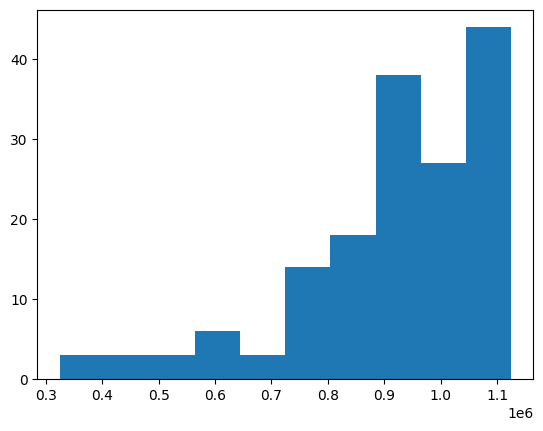

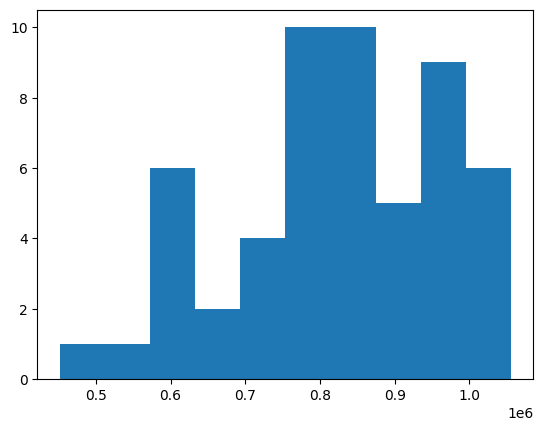

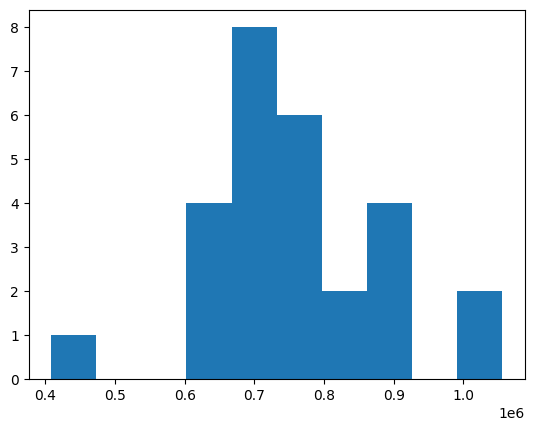

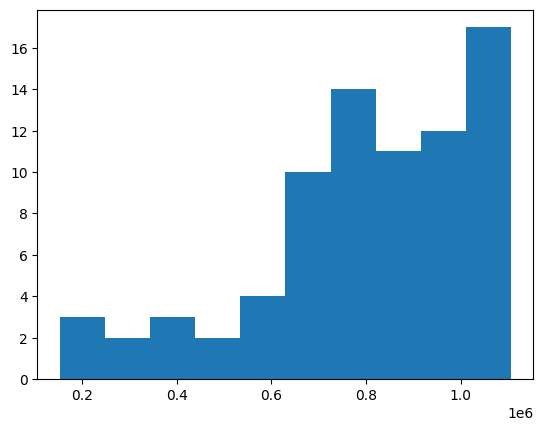

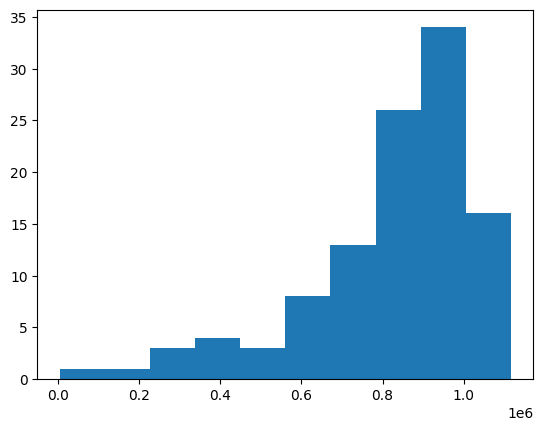

In [102]:
plt.hist(c1)
plt.show()
plt.hist(c2)
plt.show()
plt.hist(c3)
plt.show()
plt.hist(c4)
plt.show()
plt.hist(c5)
plt.show()

In [50]:
data = data.drop(columns=['Filename'])
data[featuresRand[0]]

F955      F286      F325      F524      F643
0    0.303392  0.001814  0.000428  0.355153  0.427084
1    0.115139  0.002637  0.001379 -0.001229  0.955245
2    0.610781  0.000748  0.000654  0.548848  0.180931
3   -0.693724  0.002427  0.000999  0.387356  0.028037
4   -0.809427  0.007302  0.001100  0.044054 -0.301431
..        ...       ...       ...       ...       ...
422  0.110537  0.000428  0.002665  0.939842  0.605356
423  0.671797  0.004925  0.001627  0.351745  0.757296
424 -0.477928  0.001498  0.002300 -0.089782  0.487856
425 -0.018518 -0.001121  0.002492 -0.613908 -0.193500
426  0.990795  0.001676  0.001206  0.343503  0.681323

[427 rows x 5 columns]

In [ ]:
from sklearn.utils import compute_class_weight

def scaleData(data):
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)
    

def trainCLassifier(data, labels, columns, c, gamma, degree):
    class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(labels),
                                        y = labels                                                    
                                    )
    class_weights = dict(zip(np.unique(labels), class_weights))
    X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                        stratify=labels, 
                                                        test_size=0.3, random_state=0)
    
    linear = svm.SVC(kernel='linear', C=c, class_weight=class_weights).fit(X_train, y_train)
    rbf = svm.SVC(kernel='rbf', gamma=gamma, C=c, class_weight=class_weights).fit(X_train, y_train)
    poly = svm.SVC(kernel='poly', degree=degree, C=c, class_weight=class_weights).fit(X_train, y_train)
    sig = svm.SVC(kernel='sigmoid', C=c, class_weight=class_weights).fit(X_train, y_train)
    
    linear_pred = linear.predict(X_test)
    poly_pred = poly.predict(X_test)
    rbf_pred = rbf.predict(X_test)
    sig_pred = sig.predict(X_test)
    
    # retrieve the accuracy and print it for all 4 kernel functions
    accuracy_lin = linear.score(X_test, y_test)
    accuracy_poly = poly.score(X_test, y_test)
    accuracy_rbf = rbf.score(X_test, y_test)
    accuracy_sig = sig.score(X_test, y_test)
    print(len(np.where(y_test.sort_index()==linear_pred)))
    print(len(np.where(y_test==linear_pred)))
    
    print("C: ", c, "\nGamma: ", gamma)
    print("Accuracy Linear Kernel:", accuracy_lin)
    print("Accuracy Polynomial Kernel:", accuracy_poly)
    print("Accuracy Radial Basis Kernel:", accuracy_rbf)
    print("Accuracy Sigmoid Kernel:", accuracy_sig)

In [130]:

features = ["F206", "F847", "F629", "F948", "F790", "F657"]
for c in [0.1, 0.5, 1, 3, 6, 100]:
    for gamma in [0.1, 0.5, 1, 5]:
        for degree in [1, 3, 10, 20, 30]:
            scaled = scaleData(data.drop(columns="Filename"))
            trainCLassifier(scaled, train["class"], featureNames, c, gamma, degree)


0       True
1       True
2       True
4       True
5      False
       ...  
415    False
417     True
418    False
421    False
424    False
Name: class, Length: 129, dtype: bool
C:  0.1 
Gamma:  0.1
Accuracy Linear Kernel: 0.4496124031007752
Accuracy Polynomial Kernel: 0.37209302325581395
Accuracy Radial Basis Kernel: 0.12403100775193798
Accuracy Sigmoid Kernel: 0.08527131782945736
0       True
1       True
2       True
4       True
5      False
       ...  
415    False
417     True
418    False
421    False
424    False
Name: class, Length: 129, dtype: bool
C:  0.1 
Gamma:  0.1
Accuracy Linear Kernel: 0.4496124031007752
Accuracy Polynomial Kernel: 0.46511627906976744
Accuracy Radial Basis Kernel: 0.12403100775193798
Accuracy Sigmoid Kernel: 0.08527131782945736
0       True
1       True
2       True
4       True
5      False
       ...  
415    False
417     True
418    False
421    False
424    False
Name: class, Length: 129, dtype: bool
C:  0.1 
Gamma:  0.1
Accuracy Linear Kernel

In [123]:
def trainCLassifierKNN(data, labels, columns, n):

    X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                        stratify=labels, 
                                                        test_size=0.3, random_state=0)
    
    
    modelKNN = neighbors.KNeighborsClassifier(n_neighbors=n, metric="euclidean").fit(X_train, y_train)
    y_pred = modelKNN.predict(X_test)

    
    # retrieve the accuracy and print it for all 4 kernel functions
    accuracy = modelKNN.score(X_test, y_test)
    
    print("N: ", n,)
    print("Accuracy Linear Kernel:", accuracy)
    

for n in [1, 3, 5, 7, 9, 15, 20, 30]:
            scaled = scaleData(data.drop(columns="Filename"))
            trainCLassifierKNN(scaled, train["class"], featureNames, n)

N:  1
Accuracy Linear Kernel: 0.3953488372093023
N:  3
Accuracy Linear Kernel: 0.4573643410852713
N:  5
Accuracy Linear Kernel: 0.4263565891472868
N:  7
Accuracy Linear Kernel: 0.49612403100775193
N:  9
Accuracy Linear Kernel: 0.4573643410852713
N:  15
Accuracy Linear Kernel: 0.4728682170542636
N:  20
Accuracy Linear Kernel: 0.4728682170542636
N:  30
Accuracy Linear Kernel: 0.46511627906976744


0.0006608149674716289 F1
0.0007737973060355686 F1
0.0006608149674716289 F1
0.0007737973060355686 F1


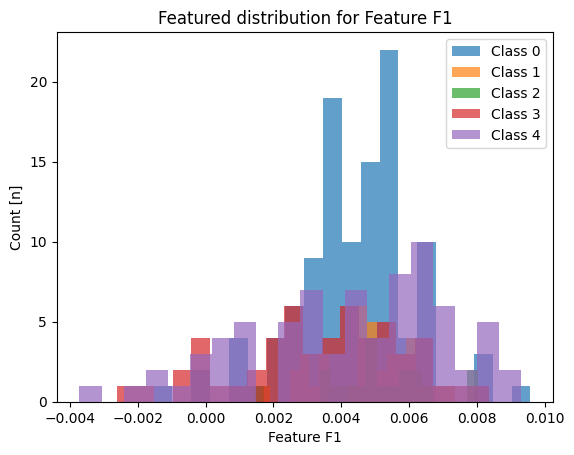

3.5834078280553585e-07 F2
0.0007657048489518282 F2
0.0002305691697466918 F2
3.5834078280553585e-07 F2
1.5629679012696123e-07 F2
1.0702445415163823e-07 F2
0.0007657048489518282 F2
1.5629679012696123e-07 F2
0.0002305691697466918 F2
1.0702445415163823e-07 F2


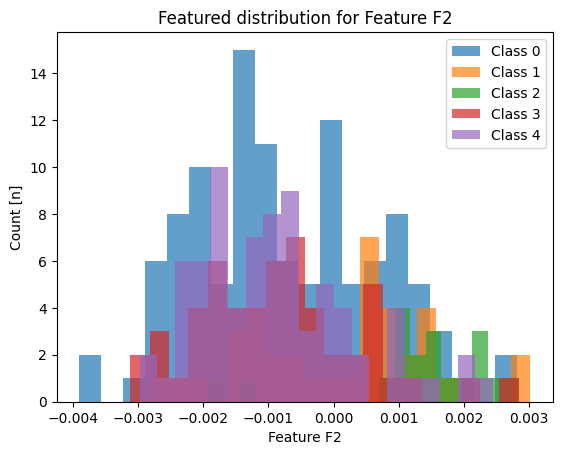

9.22781109974282e-05 F3
9.225162305185599e-07 F3
9.22781109974282e-05 F3
9.225162305185599e-07 F3
0.00026531902489478277 F3
0.0004805215193711398 F3
0.00026531902489478277 F3
0.0004805215193711398 F3


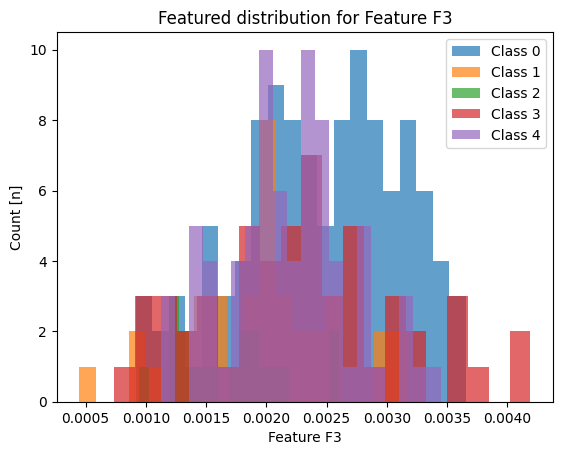

4.718444502426906e-06 F4
0.0007740704047751434 F4
4.718444502426906e-06 F4
0.0007740704047751434 F4


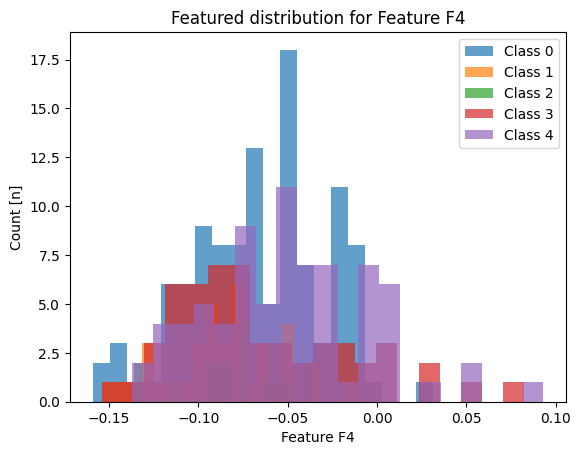

0.00015734380471671422 F5
9.414005608434275e-06 F5
0.00015734380471671422 F5
1.141642884319435e-06 F5
0.00013104676613534224 F5
9.414005608434275e-06 F5
1.141642884319435e-06 F5
0.00013104676613534224 F5


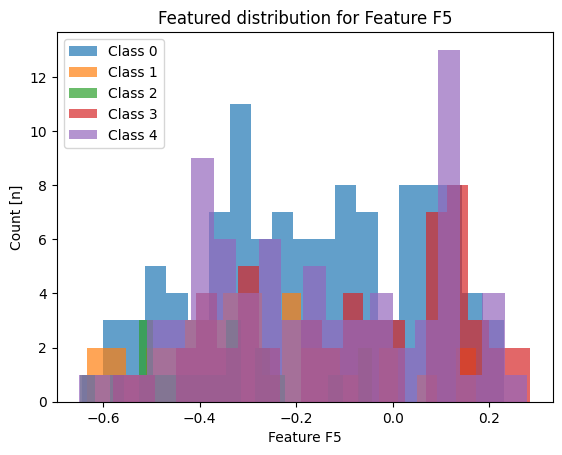

2.498734629888253e-05 F7
2.498734629888253e-05 F7
5.820314723936943e-06 F7
3.219777681333174e-05 F7
5.820314723936943e-06 F7
3.219777681333174e-05 F7


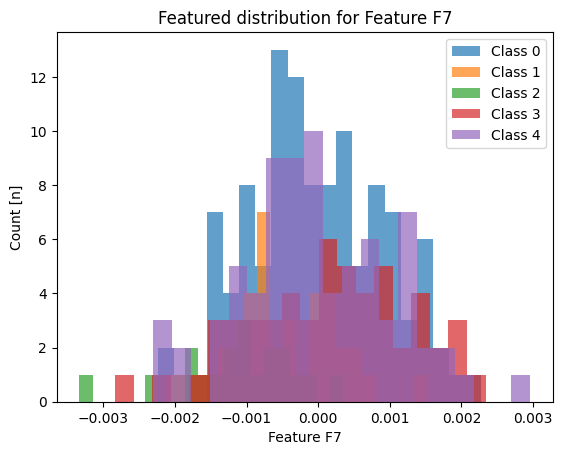

8.866612686257931e-07 F10
6.585541784486071e-07 F10
8.866612686257931e-07 F10
0.0001627633400658252 F10
0.00017864529232151425 F10
6.585541784486071e-07 F10
7.487526746661356e-06 F10
1.0177070857375742e-05 F10
0.0001627633400658252 F10
7.487526746661356e-06 F10
0.00017864529232151425 F10
1.0177070857375742e-05 F10


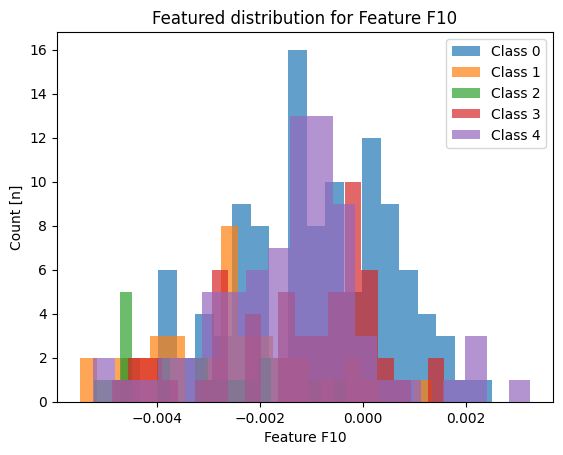

2.6753770000561386e-06 F11
0.0002231361084642744 F11
2.6753770000561386e-06 F11
1.9198065948057665e-05 F11
0.0008396469255328308 F11
1.9198065948057665e-05 F11
0.0002231361084642744 F11
0.0008396469255328308 F11


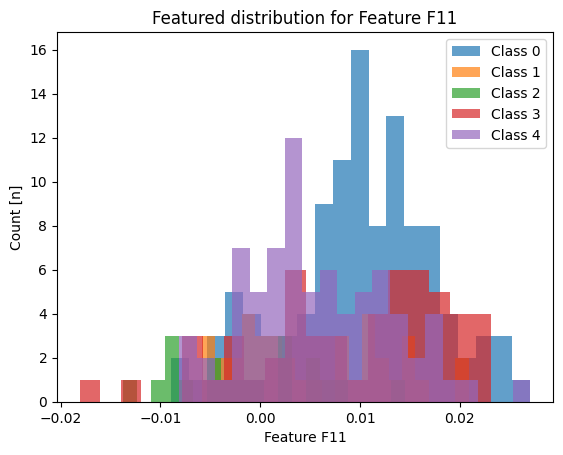

1.1065656576520068e-05 F15
1.1065656576520068e-05 F15


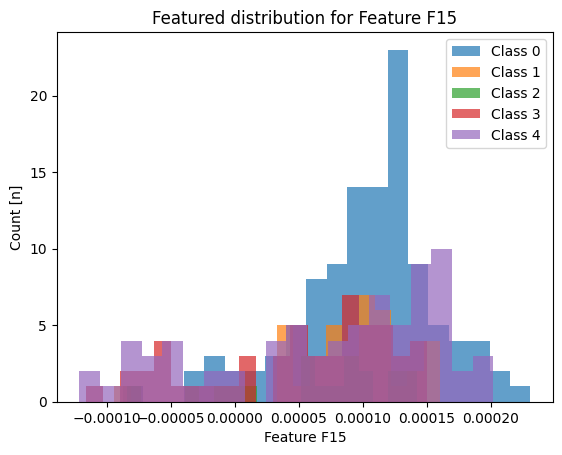

8.074969015838674e-06 F16
8.074969015838674e-06 F16


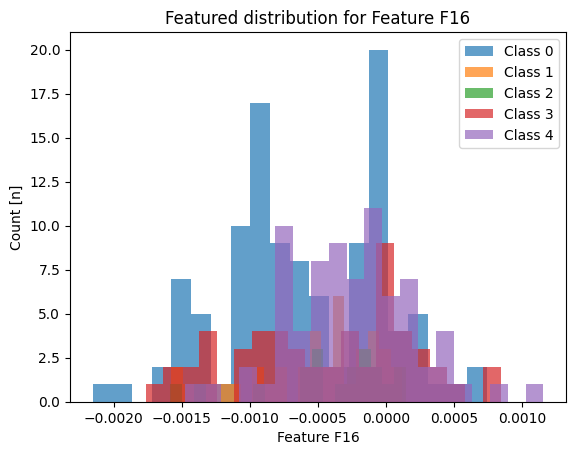

0.0004026860171671646 F17
0.0004026860171671646 F17
6.432215550895325e-07 F17
0.0007756082962255275 F17
9.214719668821068e-06 F17
6.432215550895325e-07 F17
9.214719668821068e-06 F17
0.0007756082962255275 F17


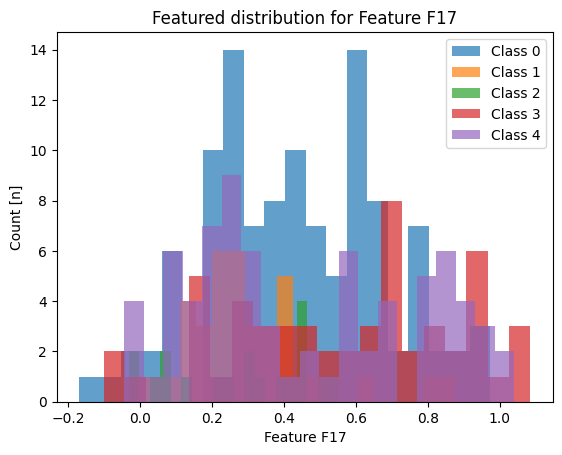

0.00029396224232106365 F18
0.00029396224232106365 F18


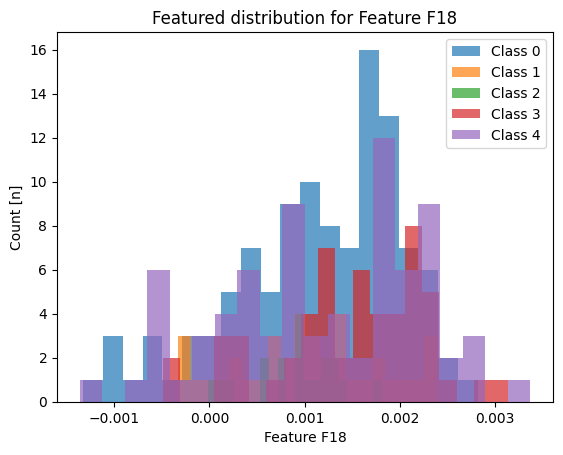

0.0005974366089496875 F19
0.0006207300832862979 F19
0.0005974366089496875 F19
4.351492137764641e-06 F19
0.00031599250820821224 F19
0.0006207300832862979 F19
4.351492137764641e-06 F19
0.00031599250820821224 F19


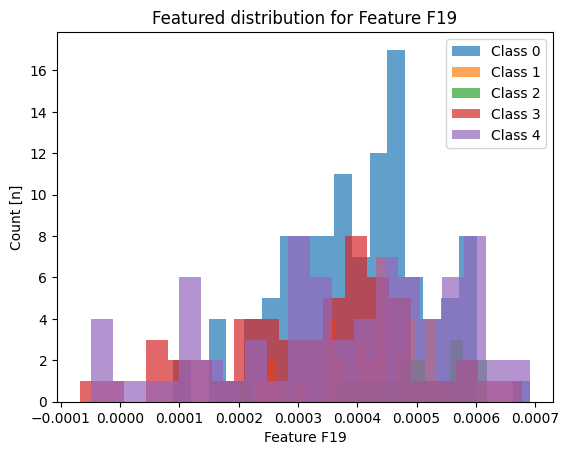

0.00046895243160507895 F20
0.00033118295772194197 F20
0.00046895243160507895 F20
0.00033118295772194197 F20


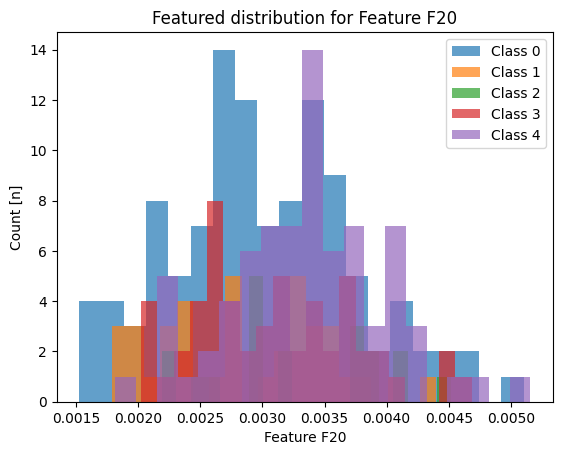

1.9770389087060684e-06 F21
1.9770389087060684e-06 F21


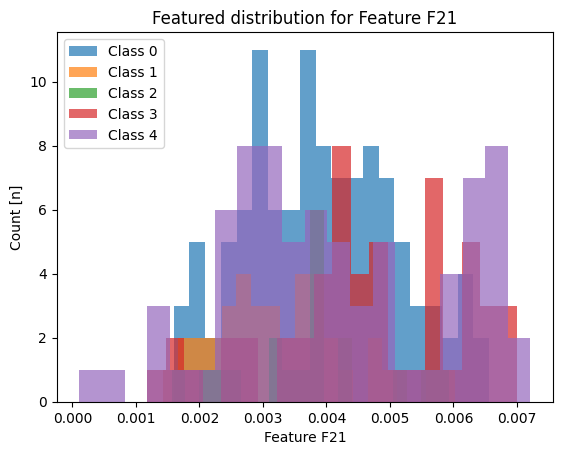

0.0001286428135865243 F22
0.0001286428135865243 F22
8.809069352179207e-06 F22
0.0004972142199494022 F22
8.809069352179207e-06 F22
0.0004972142199494022 F22


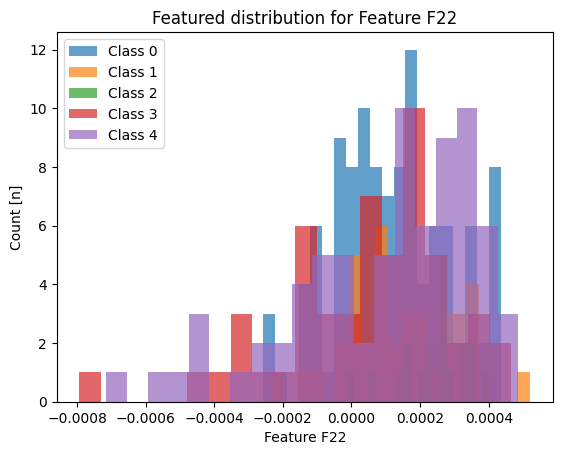

0.0009736113728297403 F23
0.0009736113728297403 F23


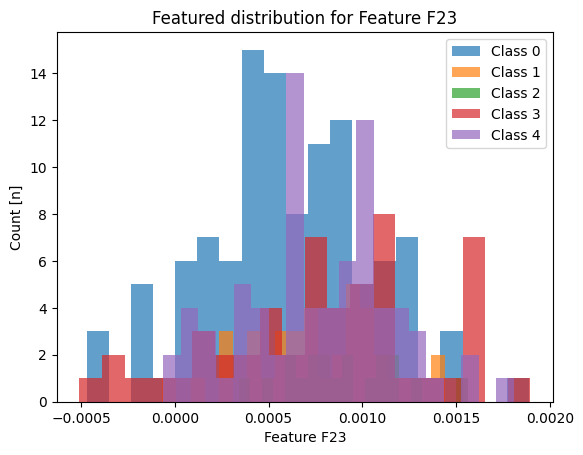

0.0007675648412047456 F24
0.0007675648412047456 F24
0.0006227914230308814 F24
0.0006227914230308814 F24


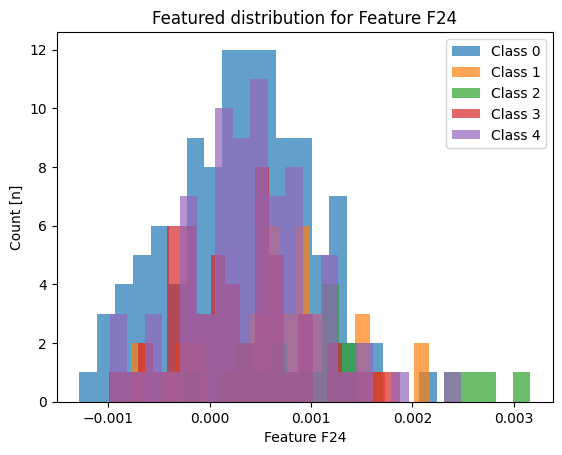

9.494844203879377e-05 F25
1.4897014991721162e-05 F25
9.494844203879377e-05 F25
1.7410695658287442e-06 F25
9.115284372833606e-05 F25
1.4897014991721162e-05 F25
1.7410695658287442e-06 F25
9.115284372833606e-05 F25


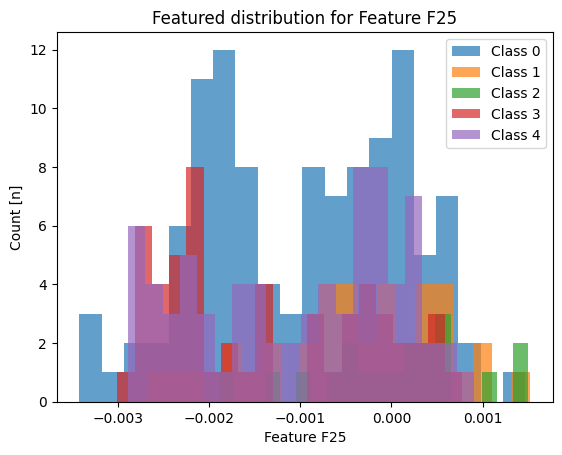

0.00034093778314312466 F27
0.000603557598825683 F27
0.00034093778314312466 F27
0.000603557598825683 F27


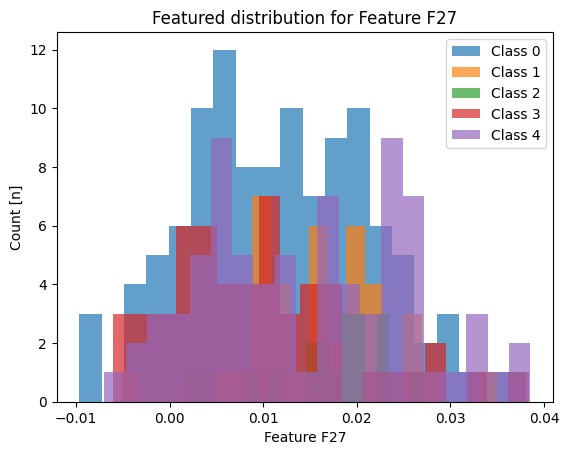

0.0007555493505394509 F28
0.0007555493505394509 F28


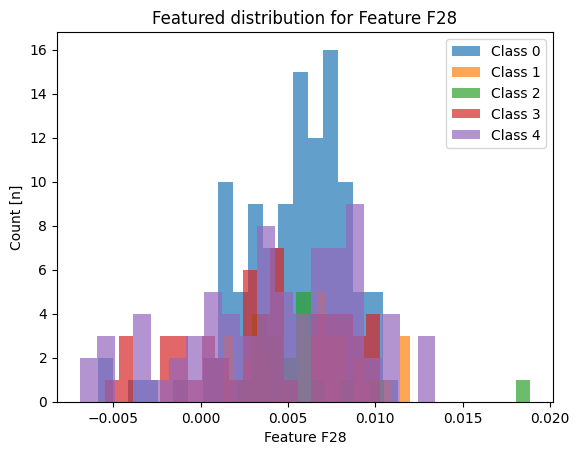

6.934212276112118e-05 F29
6.934212276112118e-05 F29
0.0004542041189658343 F29
2.478567616113844e-06 F29
0.0004542041189658343 F29
2.478567616113844e-06 F29


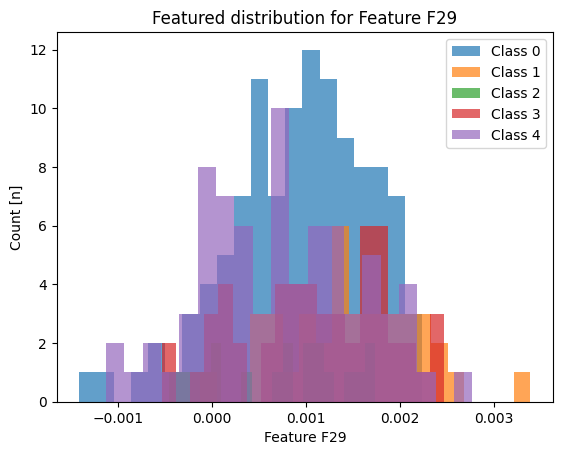

1.071738346178407e-05 F31
1.071738346178407e-05 F31
3.298916180594855e-07 F31
1.1660720712635822e-07 F31
0.00015613966141688658 F31
0.00023263874858143438 F31
3.298916180594855e-07 F31
0.00015613966141688658 F31
1.1660720712635822e-07 F31
0.00023263874858143438 F31


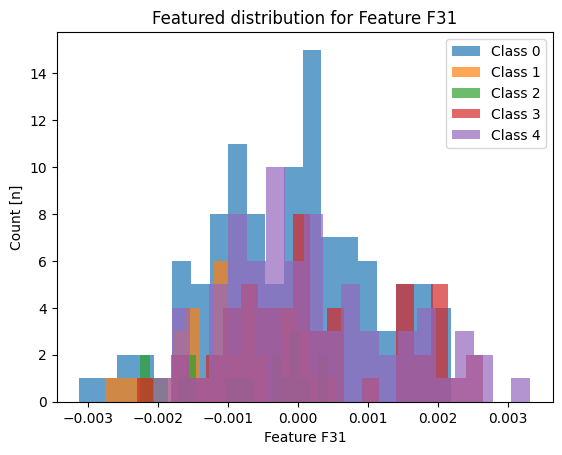

0.0008189155110274958 F34
0.0003166277507899455 F34
0.00029787813866526054 F34
0.00012800436639945174 F34
0.0008189155110274958 F34
0.00029787813866526054 F34
0.0003166277507899455 F34
0.00012800436639945174 F34


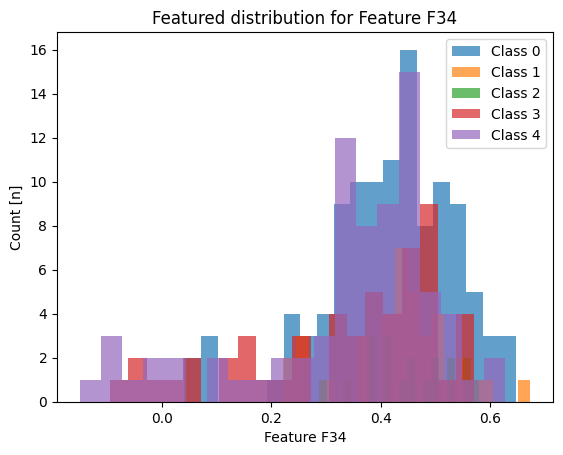

1.4423710857359856e-08 F35
1.4423710857359856e-08 F35
6.480627529653216e-08 F35
8.549979320322372e-06 F35
6.480627529653216e-08 F35
8.549979320322372e-06 F35


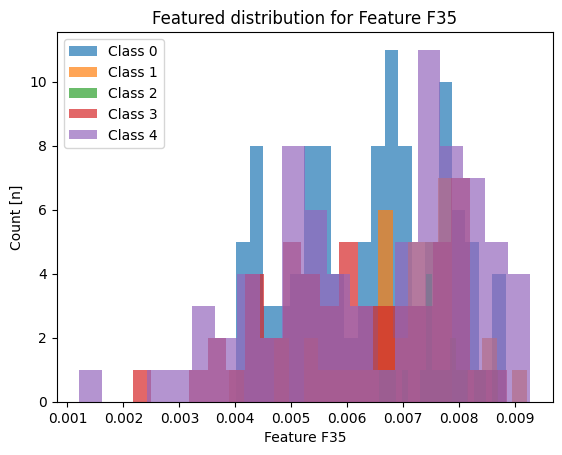

6.676043278071359e-05 F36
6.676043278071359e-05 F36


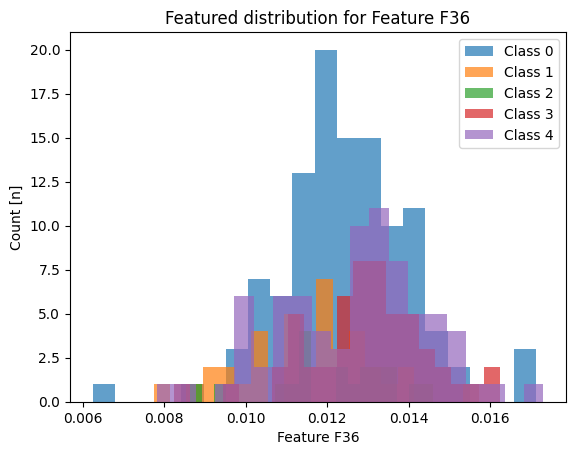

0.0005617462788745942 F37
0.00011353486719159222 F37
0.0005617462788745942 F37
6.655882020272595e-05 F37
0.00011353486719159222 F37
6.655882020272595e-05 F37


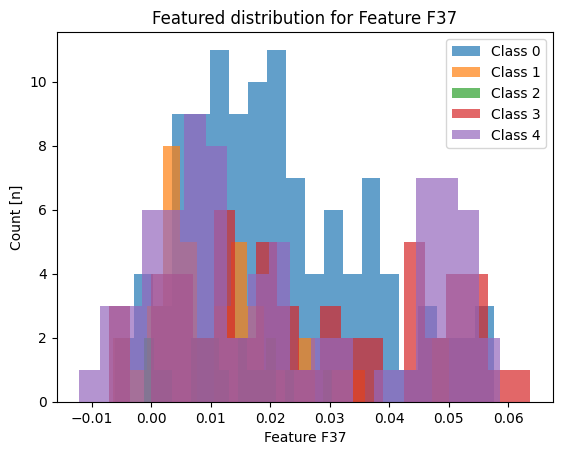

0.00016745102854101078 F39
0.00016745102854101078 F39


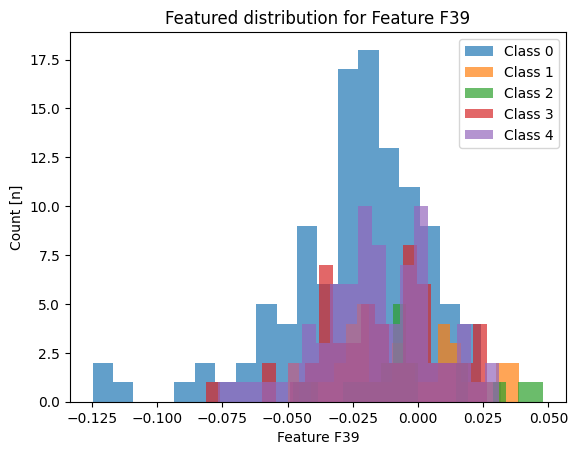

0.0004535223744429757 F40
0.0005145802396846327 F40
0.0004535223744429757 F40
0.0005145802396846327 F40


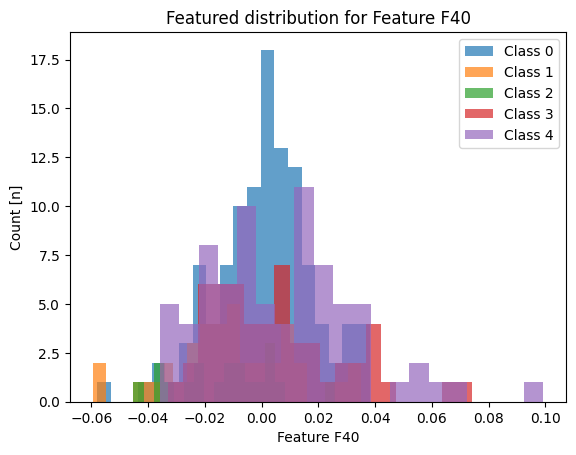

6.246705627355745e-05 F41
6.246705627355745e-05 F41


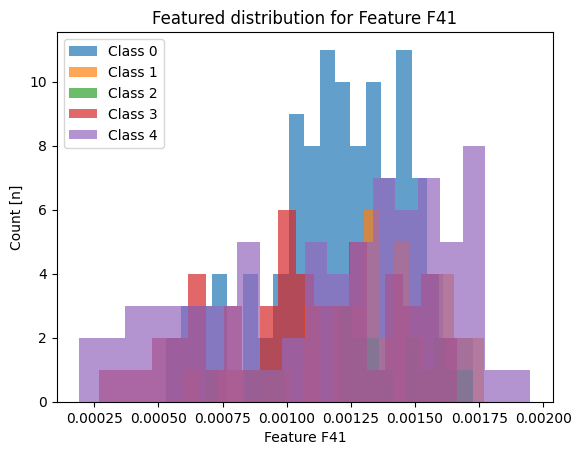

0.0002012712822396529 F42
0.0005683501649790348 F42
0.0002012712822396529 F42
3.4041333858509646e-05 F42
0.0005683501649790348 F42
3.4041333858509646e-05 F42


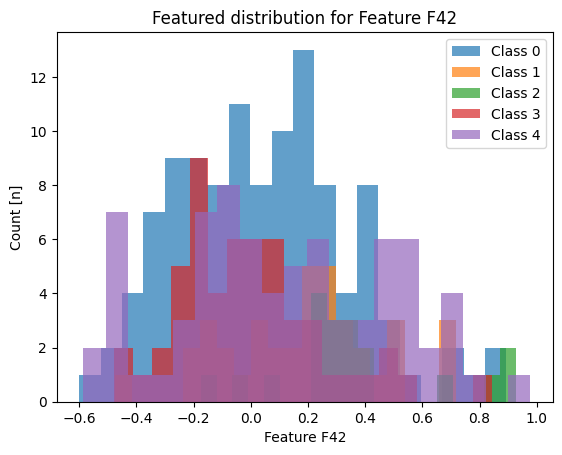

1.2791486640478196e-05 F44
1.2791486640478196e-05 F44


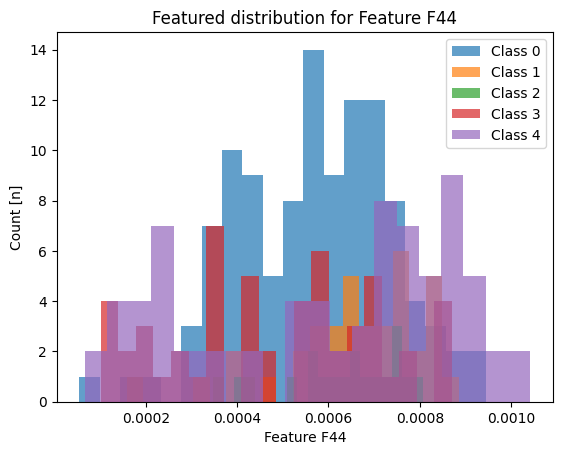

9.501759017729157e-05 F45
9.501759017729157e-05 F45


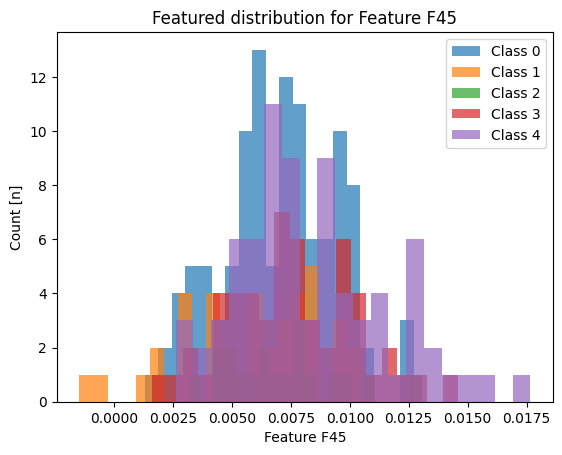

1.1291474614764462e-05 F47
4.080770050324784e-07 F47
1.1291474614764462e-05 F47
1.3337403734745349e-07 F47
4.080770050324784e-07 F47
6.479461543968e-09 F47
0.00019569645625692875 F47
1.3337403734745349e-07 F47
6.479461543968e-09 F47
0.00019569645625692875 F47


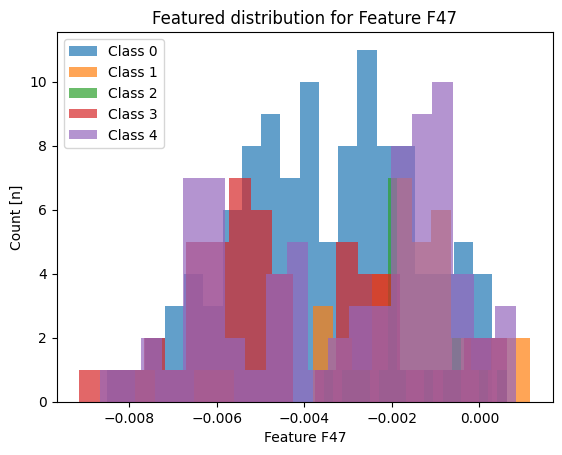

0.0006258004845228078 F51
0.0006258004845228078 F51


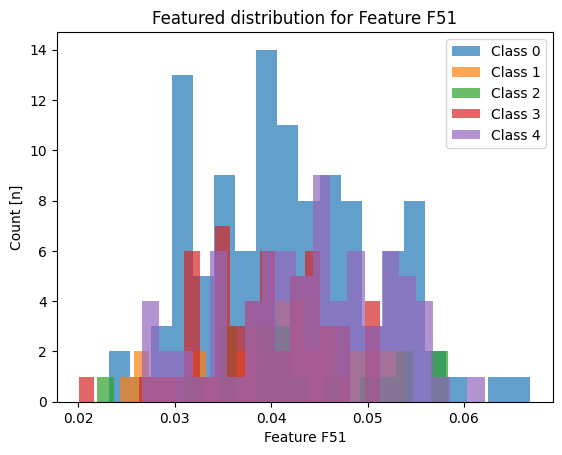

9.366574237438224e-08 F52
9.366574237438224e-08 F52
2.1553071456754434e-07 F52
0.00010355766719875927 F52
2.1553071456754434e-07 F52
0.00010355766719875927 F52


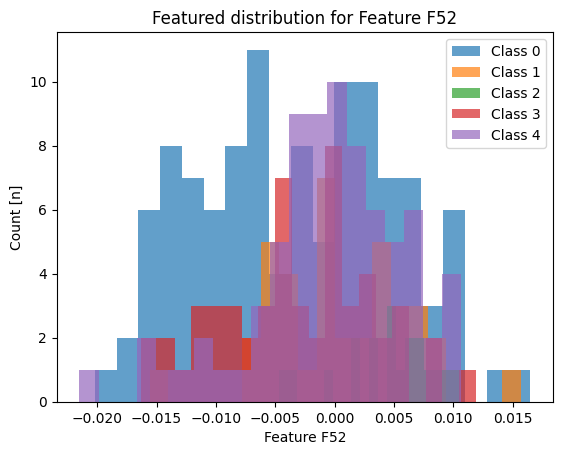

1.084360667753023e-06 F55
1.084360667753023e-06 F55


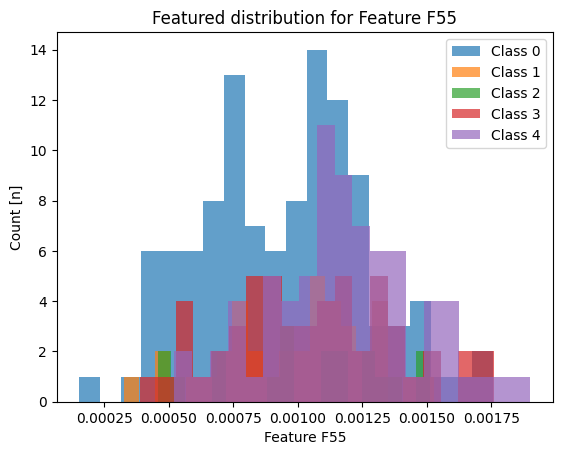

0.0001790018215172761 F58
0.0001790018215172761 F58
0.00010837399966985566 F58
0.00010837399966985566 F58


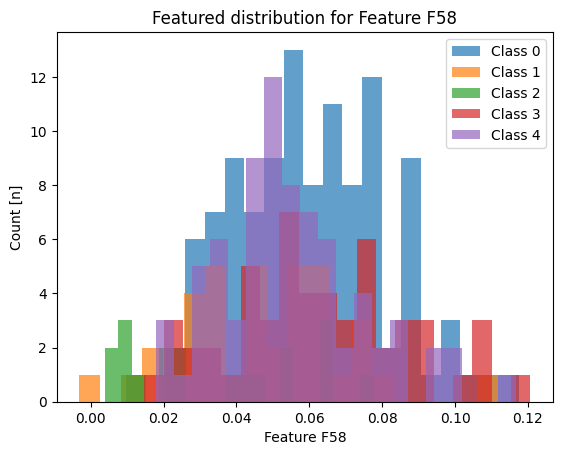

0.0002479224184782222 F61
4.303010058076684e-05 F61
0.0002479224184782222 F61
4.303010058076684e-05 F61


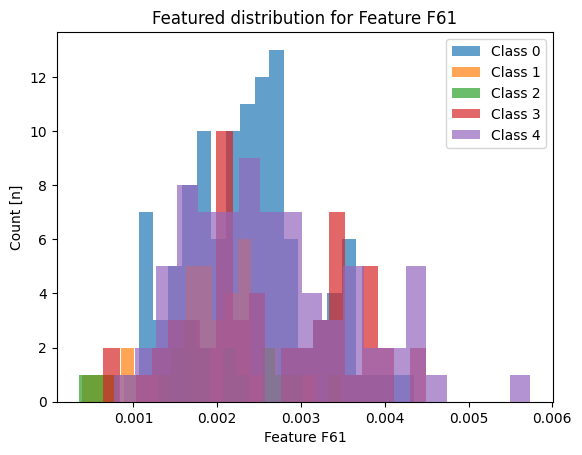

1.0187667591575185e-05 F63
1.0187667591575185e-05 F63
0.00014728900124227583 F63
0.00014728900124227583 F63


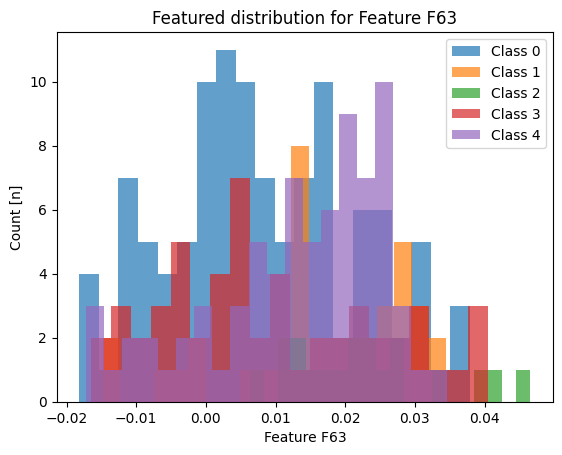

0.00012243058074260231 F65
3.3452490102990815e-05 F65
0.00012243058074260231 F65
3.3452490102990815e-05 F65


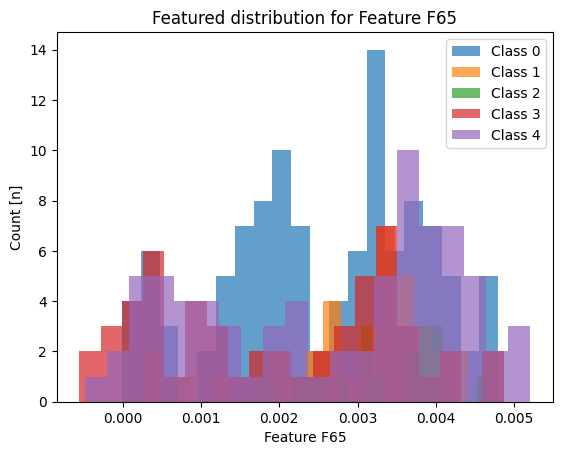

0.00015599891227542224 F66
2.7021778427106503e-05 F66
0.00015599891227542224 F66
2.7021778427106503e-05 F66


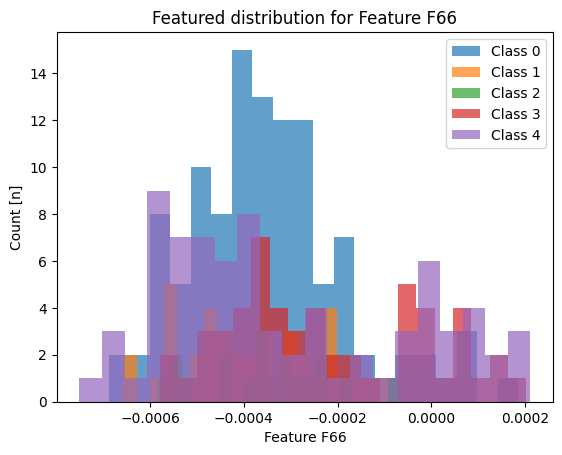

0.0006369928135120602 F69
0.0006511413106240496 F69
0.0006369928135120602 F69
0.00035051748857781244 F69
0.00024271177302834284 F69
0.00035051748857781244 F69
0.0006511413106240496 F69
0.00024271177302834284 F69


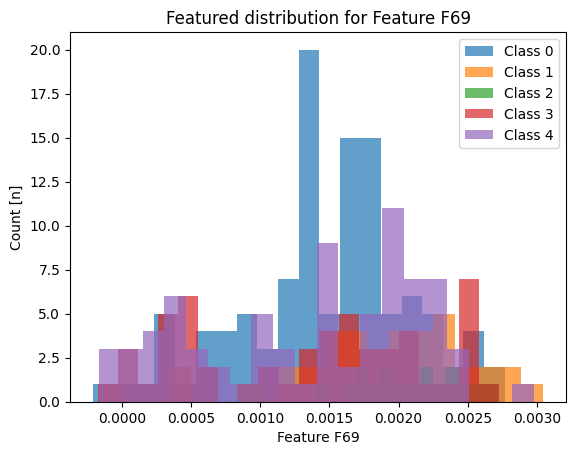

9.762915951088207e-05 F70
1.9527311804321777e-05 F70
9.762915951088207e-05 F70
0.0004867886020503862 F70
2.6475804898628803e-07 F70
1.9527311804321777e-05 F70
4.231777187022253e-05 F70
3.3331211478194456e-07 F70
0.0004867886020503862 F70
4.231777187022253e-05 F70
2.6475804898628803e-07 F70
3.3331211478194456e-07 F70


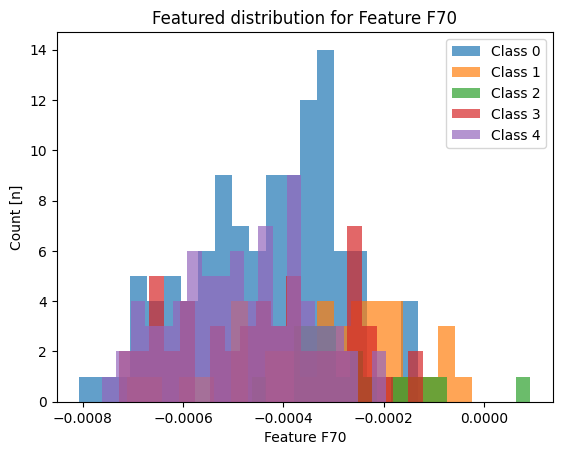

2.3410364779995474e-06 F73
2.3410364779995474e-06 F73


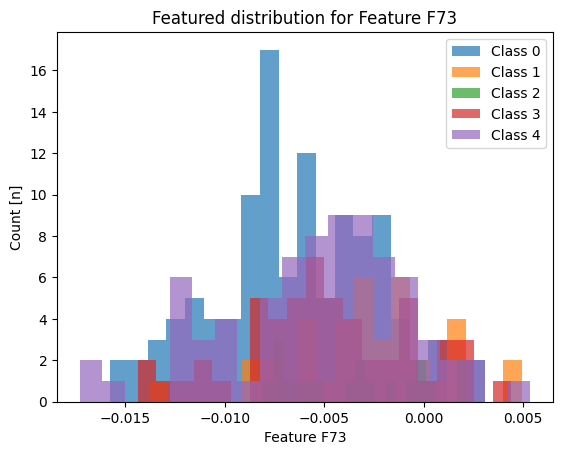

0.000964090463991234 F74
0.000964090463991234 F74


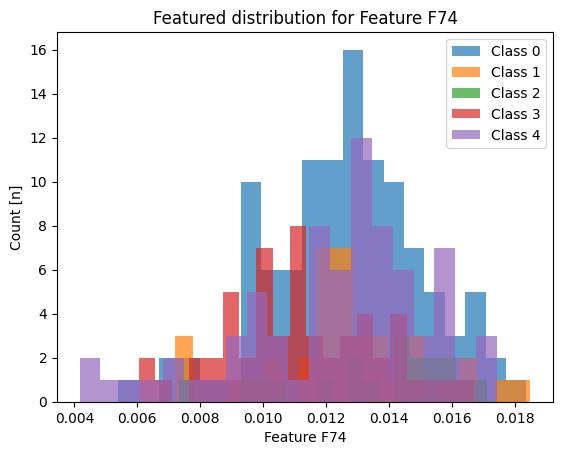

0.0005567396746037962 F75
0.0007845662784996648 F75
0.0005567396746037962 F75
0.0007845662784996648 F75


3.703617262271119e-05 F78
3.703617262271119e-05 F78


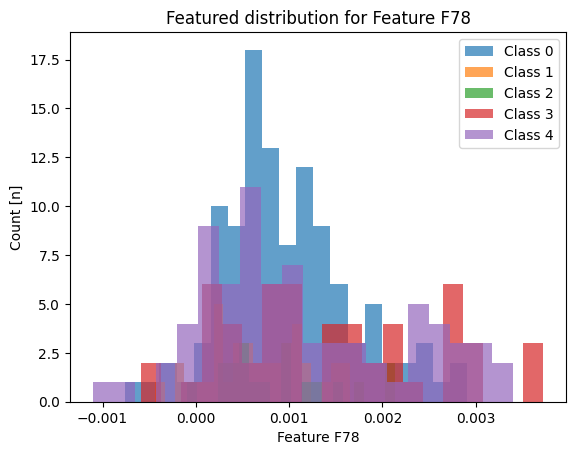

0.00016519681692381266 F79
0.00016519681692381266 F79


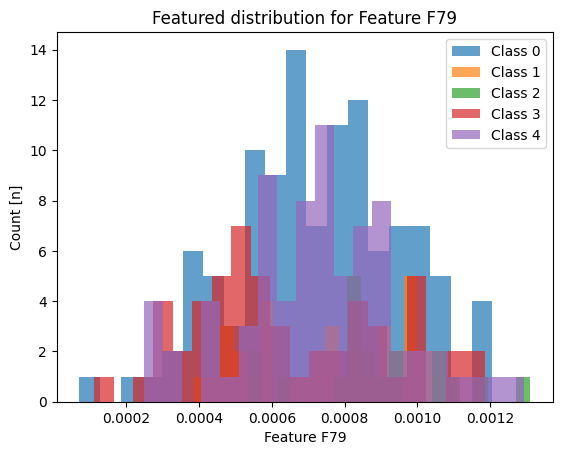

6.0309809701929504e-06 F80
6.0309809701929504e-06 F80
3.4143013198085265e-05 F80
4.922151312317485e-05 F80
3.4143013198085265e-05 F80
4.922151312317485e-05 F80


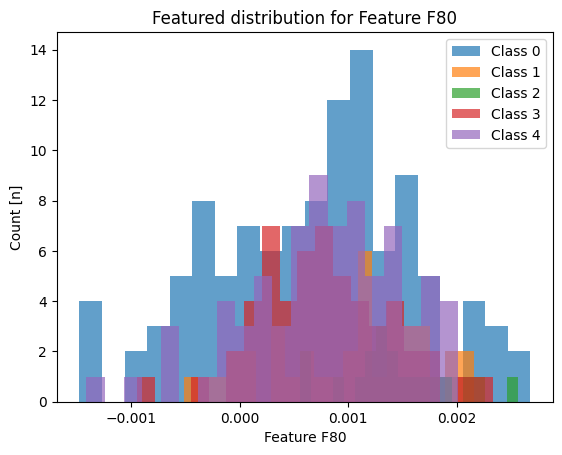

0.00043993816879369616 F81
0.00043993816879369616 F81


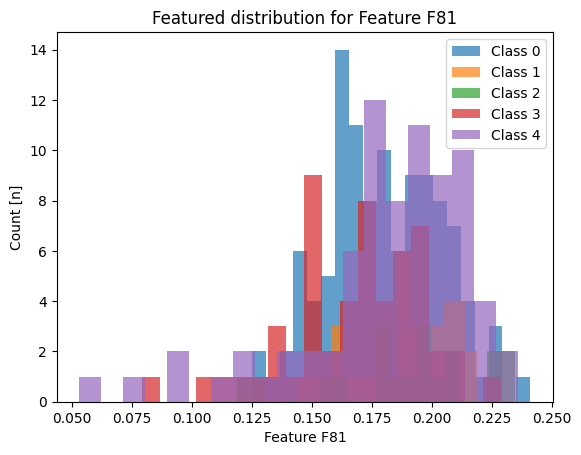

4.021758623203744e-05 F82
4.021758623203744e-05 F82
9.344283288159977e-06 F82
0.00023656518085586286 F82
9.344283288159977e-06 F82
0.00023656518085586286 F82


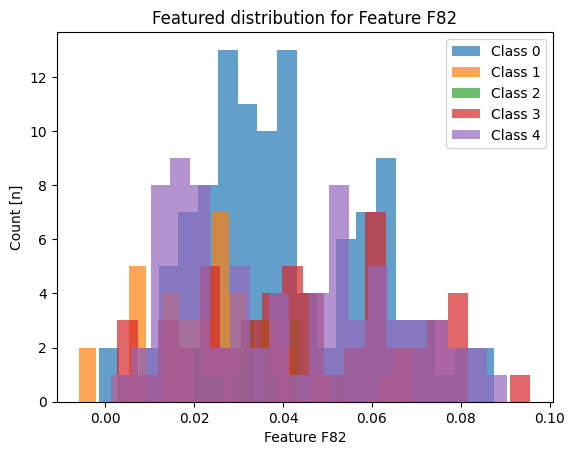

0.000566787623530923 F83
0.000566787623530923 F83


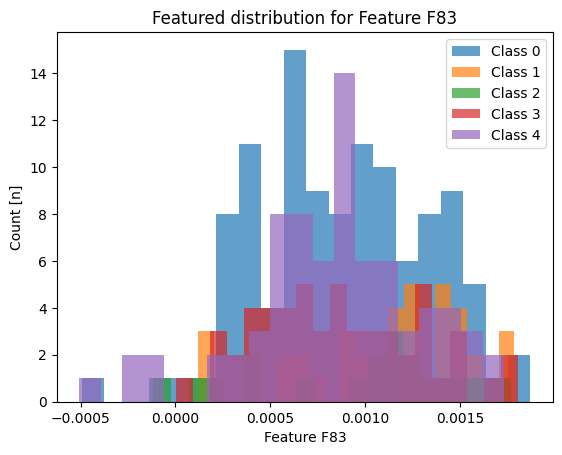

0.00011941588603407282 F87
1.7264712448764248e-06 F87
0.00011941588603407282 F87
1.0165184564607908e-06 F87
1.7264712448764248e-06 F87
1.4013568943464067e-08 F87
4.2160292569389264e-05 F87
1.0165184564607908e-06 F87
1.4013568943464067e-08 F87
4.2160292569389264e-05 F87


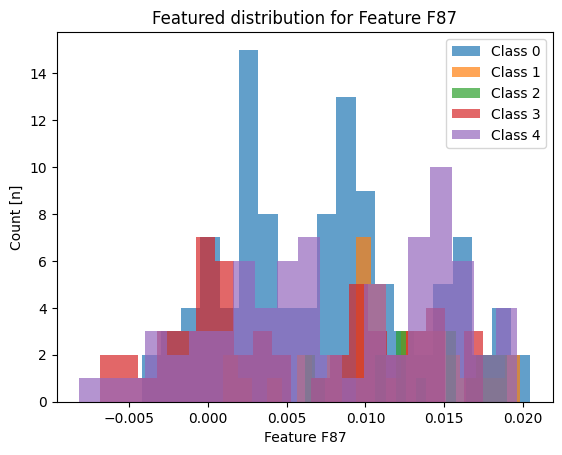

4.158399654258337e-05 F88
0.0003536779119078123 F88
4.158399654258337e-05 F88
2.3669975777289828e-07 F88
6.543711590080808e-07 F88
4.695048889662906e-08 F88
0.0003536779119078123 F88
2.3669975777289828e-07 F88
6.543711590080808e-07 F88
4.695048889662906e-08 F88


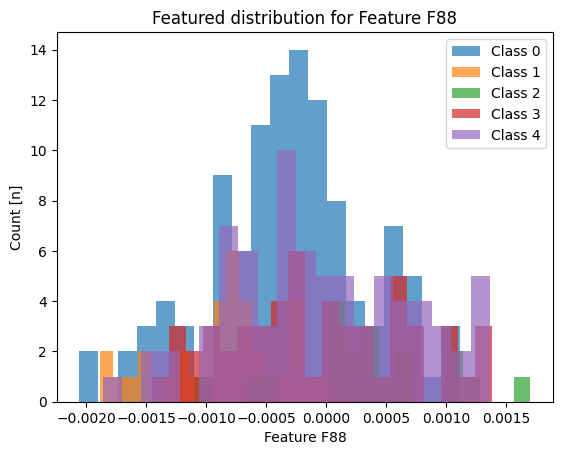

0.0004047809459349548 F89
0.0004047809459349548 F89


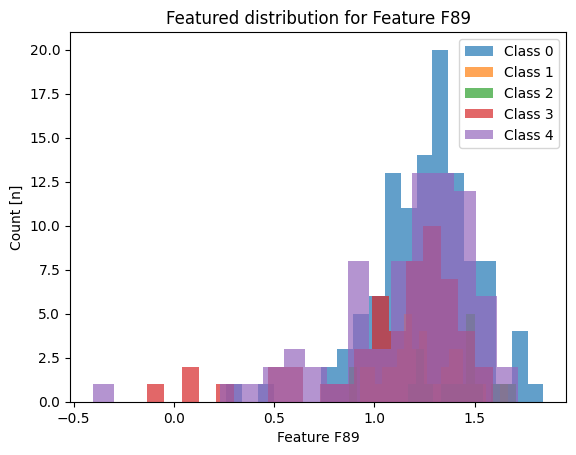

1.378771408638134e-05 F92
1.378771408638134e-05 F92
9.06928944473495e-06 F92
9.06928944473495e-06 F92


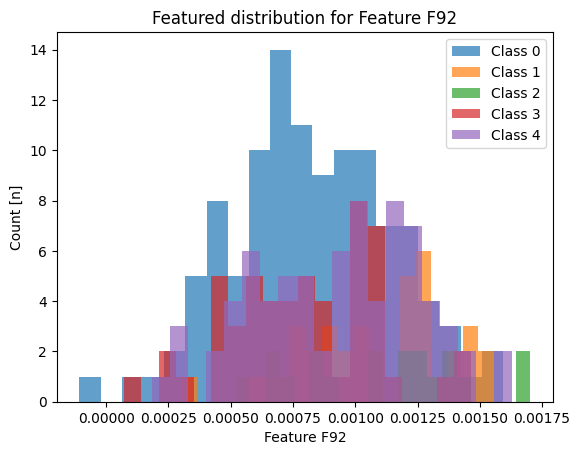

2.2395231651681652e-06 F94
1.082682692241647e-07 F94
2.2395231651681652e-06 F94
1.649600476030503e-05 F94
1.082682692241647e-07 F94
1.3799653788031624e-07 F94
5.2853403082510787e-05 F94
1.649600476030503e-05 F94
1.3799653788031624e-07 F94
5.2853403082510787e-05 F94


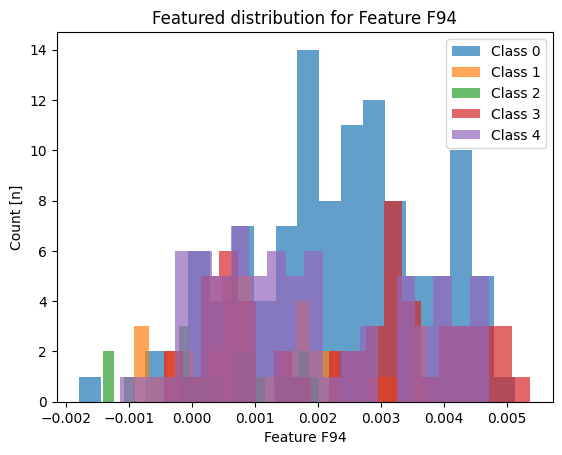

4.334978931925063e-05 F99
4.334978931925063e-05 F99
4.352162157741345e-05 F99
0.0006026638270738425 F99
4.352162157741345e-05 F99
0.0006026638270738425 F99


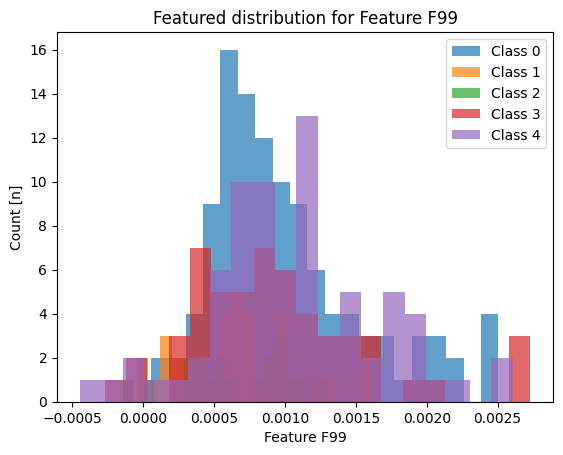

4.398094986449878e-06 F101
0.00031669188739516746 F101
4.398094986449878e-06 F101
0.00031669188739516746 F101


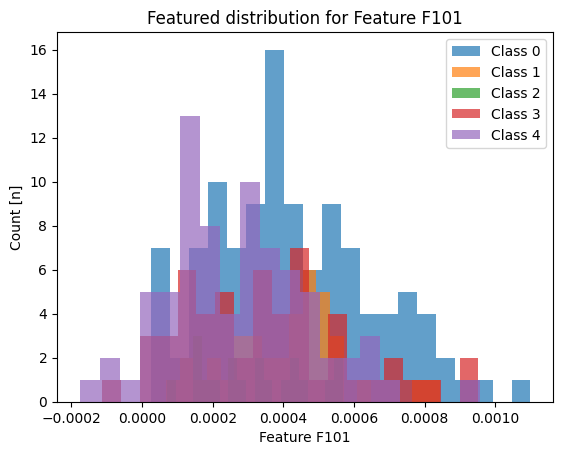

4.593298485298071e-06 F106
0.00011649386340106826 F106
4.593298485298071e-06 F106
5.329348006656118e-08 F106
0.00024155588571021168 F106
0.00011649386340106826 F106
5.329348006656118e-08 F106
0.00024155588571021168 F106


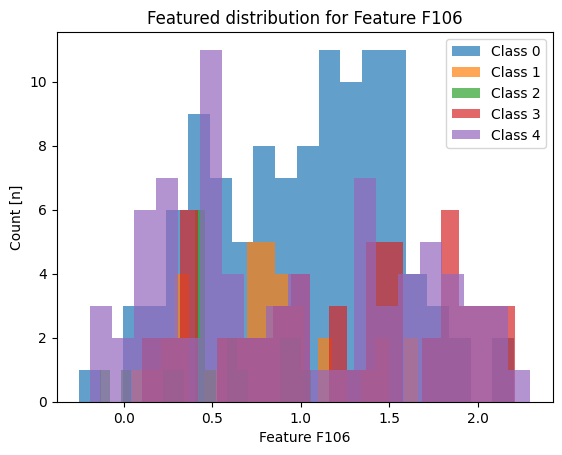

0.0002020906355649054 F107
1.131132478893588e-06 F107
0.0002020906355649054 F107
3.275686241330879e-05 F107
0.0005228482423892791 F107
1.131132478893588e-06 F107
1.2445598393382633e-07 F107
2.14500875575722e-06 F107
3.275686241330879e-05 F107
1.2445598393382633e-07 F107
0.0005228482423892791 F107
2.14500875575722e-06 F107


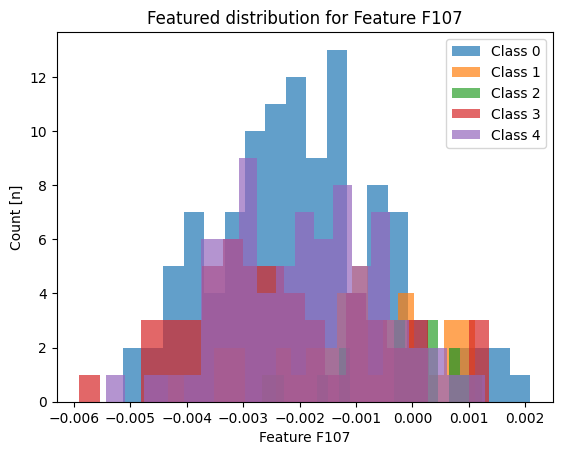

0.0008339167185080318 F109
0.0008339167185080318 F109


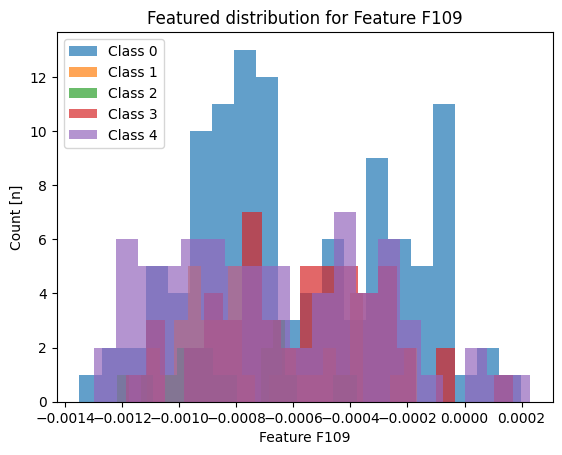

7.5950799313274e-05 F111
7.5950799313274e-05 F111
5.039236479057967e-06 F111
5.039236479057967e-06 F111


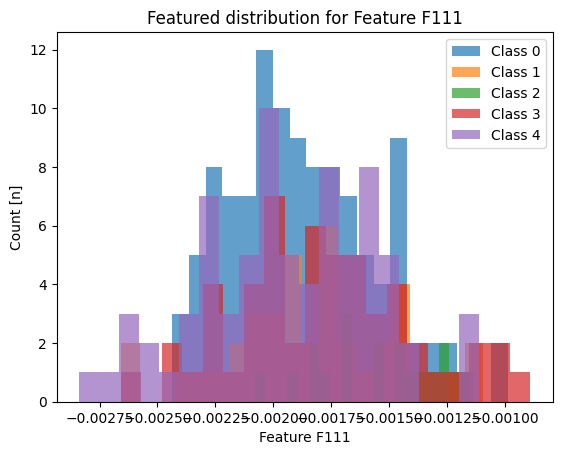

0.0003729817585927875 F113
0.0003729817585927875 F113
0.0004762855113777542 F113
0.0004762855113777542 F113


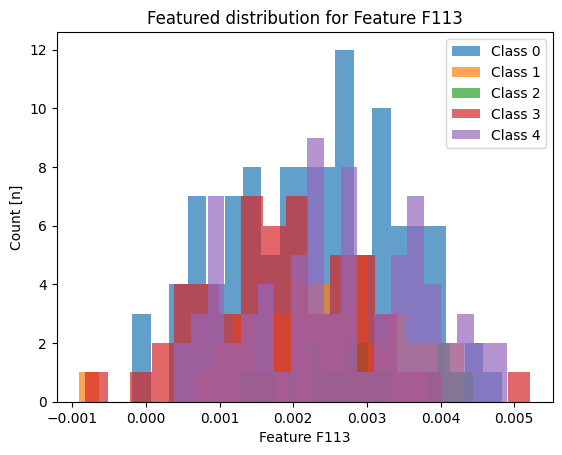

7.555633081292909e-05 F114
2.1330024609823594e-06 F114
7.555633081292909e-05 F114
6.723954672262358e-05 F114
2.1330024609823594e-06 F114
5.089745644933516e-07 F114
6.723954672262358e-05 F114
5.089745644933516e-07 F114


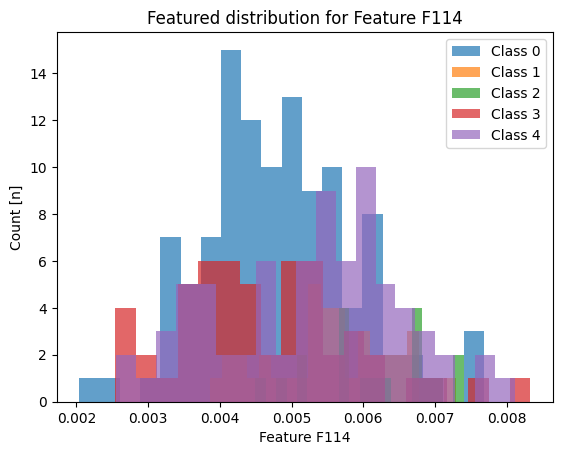

0.0008018752416059828 F117
5.210461193293487e-05 F117
0.0008018752416059828 F117
5.210461193293487e-05 F117


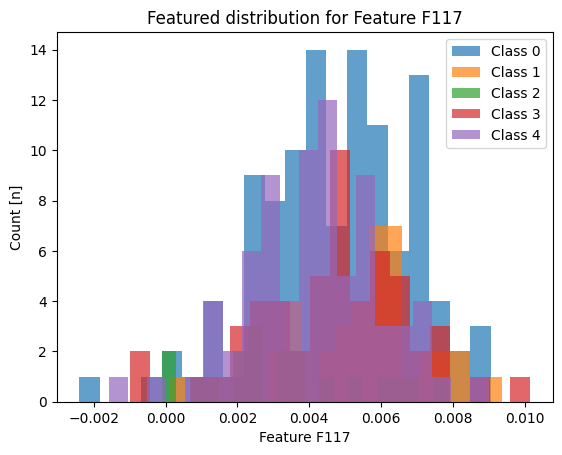

0.000289576646724908 F118
0.000289576646724908 F118
0.00035163511468079464 F118
0.00035163511468079464 F118


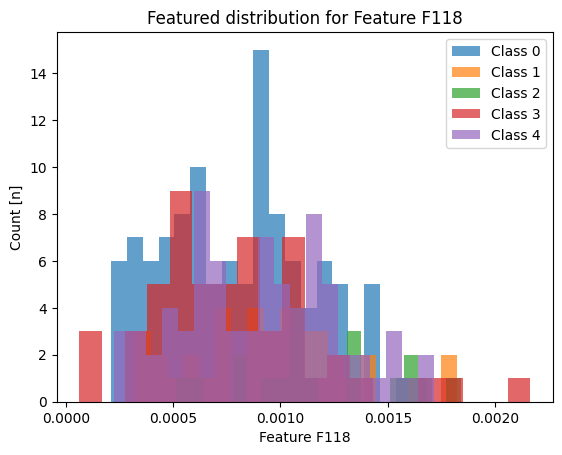

0.00031032139646082544 F119
0.0007365240691839087 F119
0.00031032139646082544 F119
0.0007365240691839087 F119


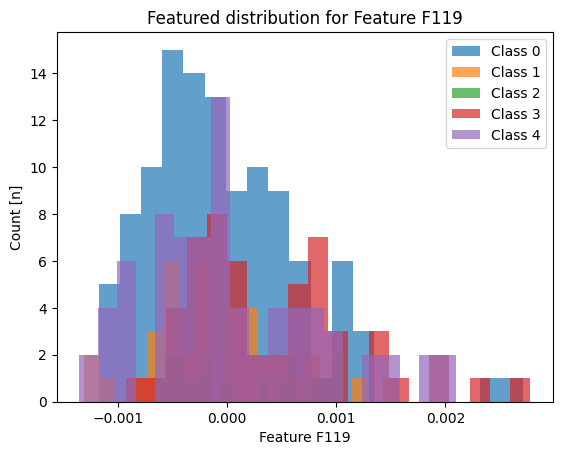

0.00022944953128014147 F123
0.00022944953128014147 F123
7.14078528234666e-08 F123
0.00010677874939198885 F123
2.215417702535398e-05 F123
7.14078528234666e-08 F123
2.215417702535398e-05 F123
0.00010677874939198885 F123


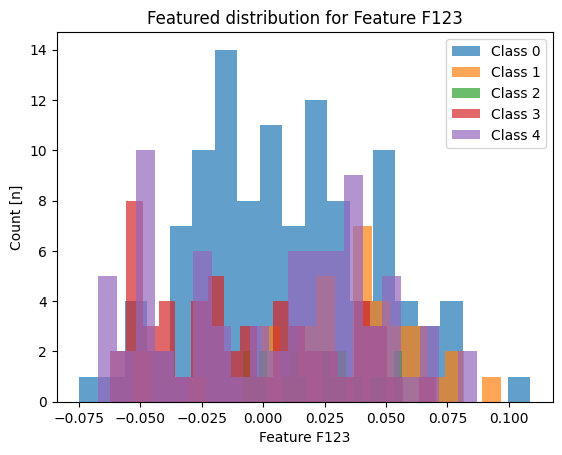

0.00011363935672602304 F124
0.00013738965221795417 F124
0.00011363935672602304 F124
0.00013738965221795417 F124


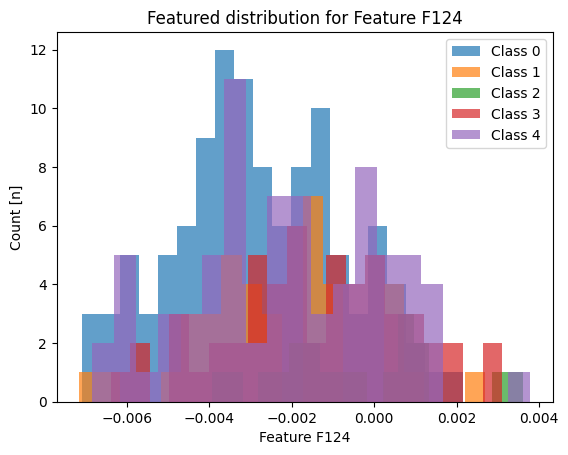

0.0006200715412658542 F126
4.8416913759485136e-05 F126
0.0006200715412658542 F126
4.8416913759485136e-05 F126


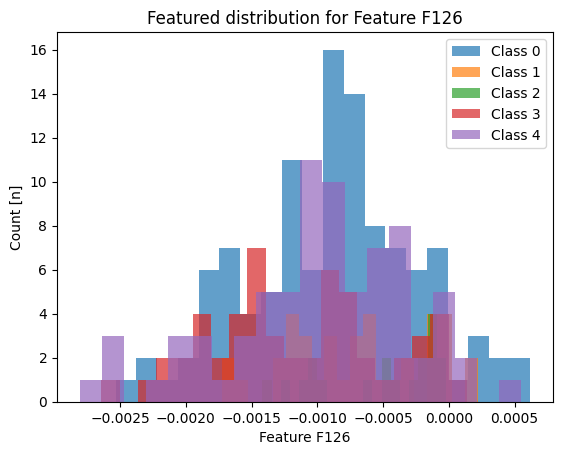

2.1799261094307256e-05 F127
0.00023212995268548028 F127
2.1799261094307256e-05 F127
0.00023212995268548028 F127
1.8232409867526853e-06 F127
6.554820605588717e-05 F127
1.8232409867526853e-06 F127
6.554820605588717e-05 F127


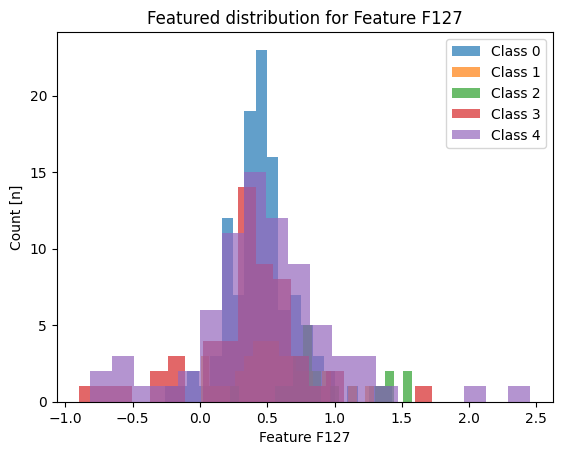

7.16389354775858e-05 F128
9.455354140205414e-05 F128
7.16389354775858e-05 F128
6.041479440629005e-06 F128
0.0009483202343227406 F128
9.455354140205414e-05 F128
6.041479440629005e-06 F128
0.0009483202343227406 F128


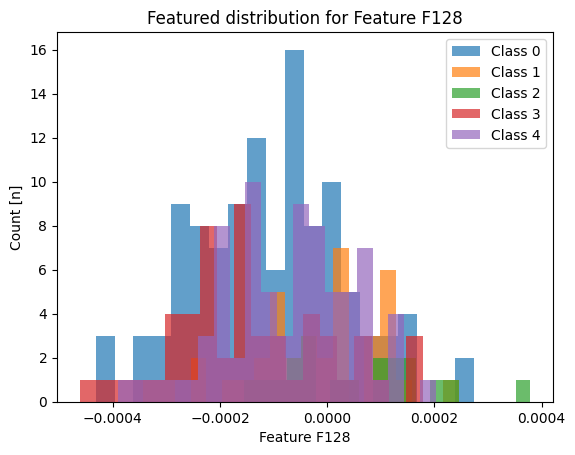

0.0003682603863052321 F130
0.0003682603863052321 F130
3.53636438598272e-05 F130
3.53636438598272e-05 F130


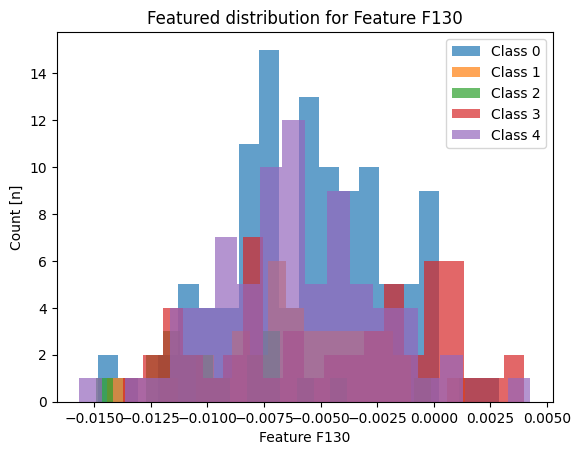

0.0002978626148921257 F131
2.6642197657185622e-05 F131
0.0005146245627064076 F131
0.0002978626148921257 F131
2.6642197657185622e-05 F131
0.0005146245627064076 F131


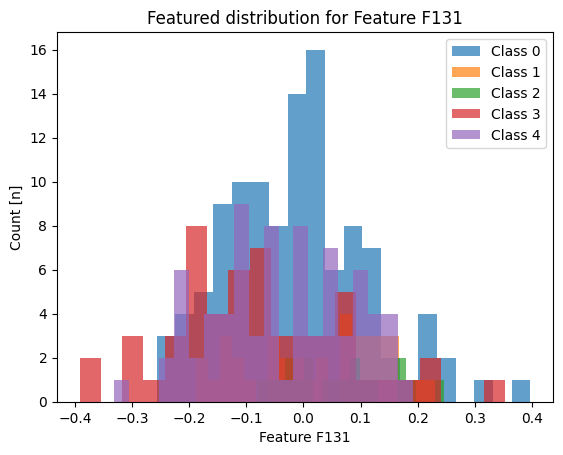

0.00058639194315657 F133
0.0006861643051469254 F133
0.00058639194315657 F133
0.0006861643051469254 F133


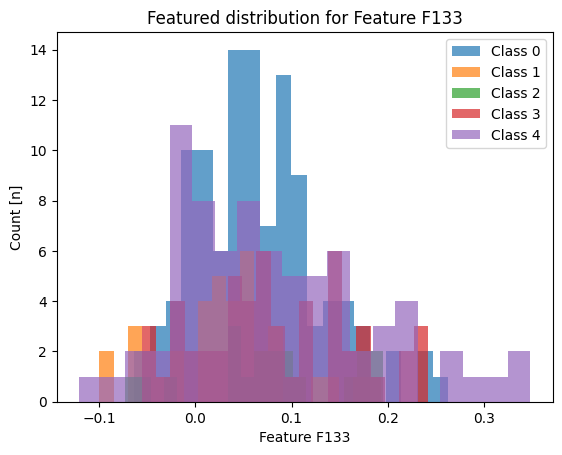

0.00015537890603811483 F136
0.00015537890603811483 F136


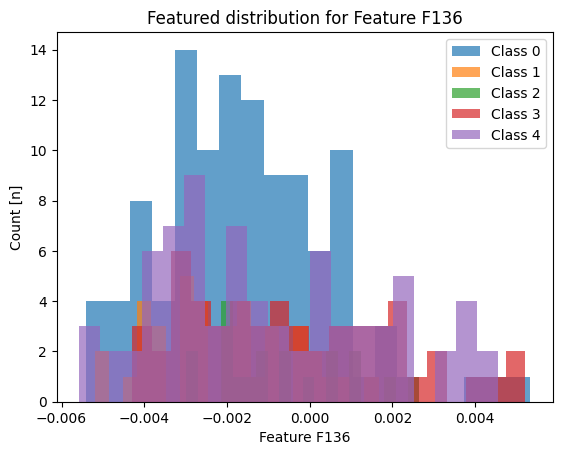

0.0002673239849922584 F138
0.0002673239849922584 F138


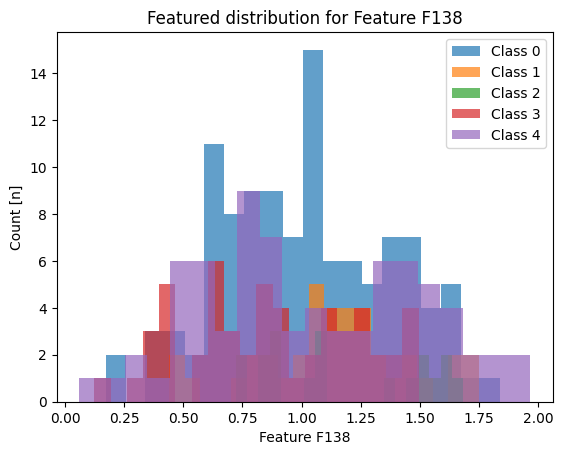

8.284861232237833e-05 F139
8.284861232237833e-05 F139
8.909439002186282e-06 F139
0.0003182009846753916 F139
8.909439002186282e-06 F139
0.0003182009846753916 F139


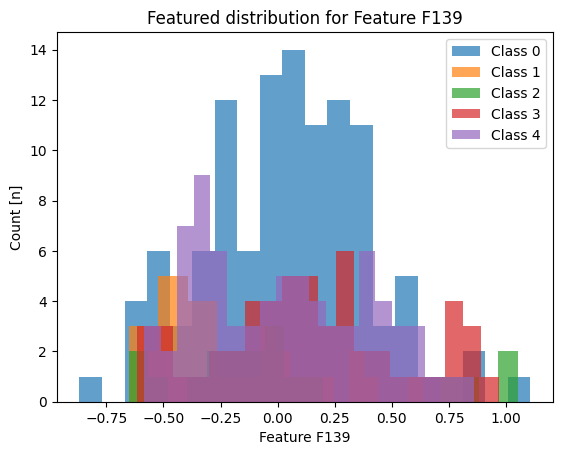

5.145862179780761e-07 F141
5.145862179780761e-07 F141


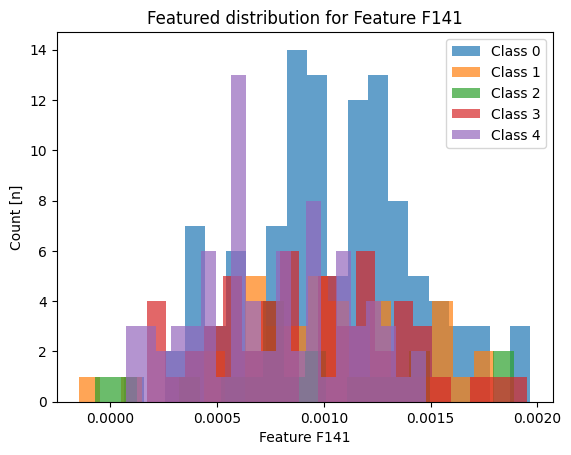

0.0007715170093820108 F142
0.00027992730352150645 F142
0.0007715170093820108 F142
0.00010101749713452299 F142
0.0007058836620909592 F142
0.00027992730352150645 F142
5.233766047461933e-05 F142
0.000229655042294484 F142
0.00010101749713452299 F142
5.233766047461933e-05 F142
0.0007058836620909592 F142
0.000229655042294484 F142


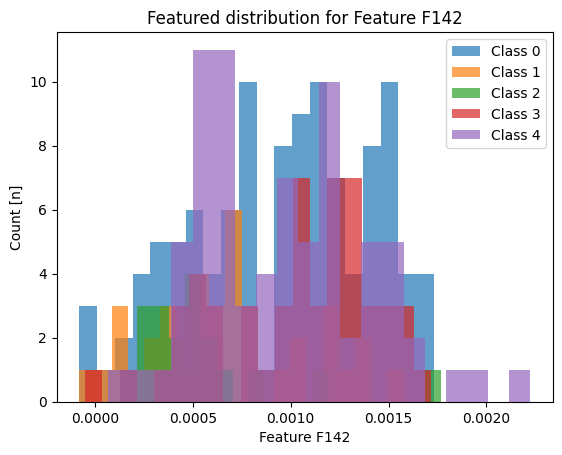

0.000813665524245747 F144
0.000813665524245747 F144


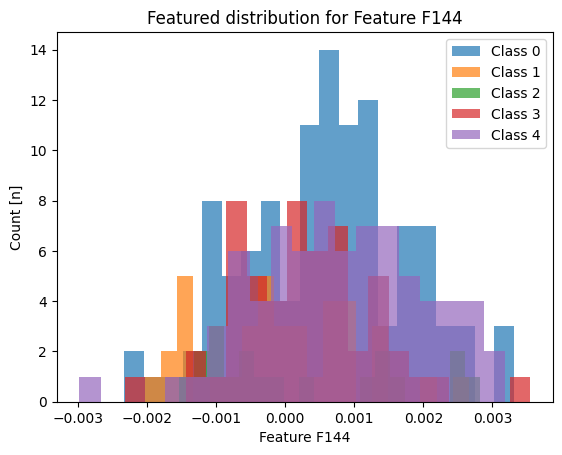

6.572556053514472e-08 F146
6.572556053514472e-08 F146
1.5014246195225765e-08 F146
2.2603455257632415e-06 F146
1.5014246195225765e-08 F146
2.2603455257632415e-06 F146


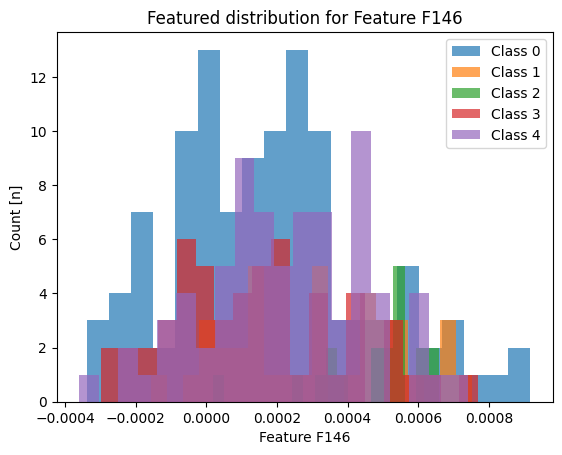

2.463385918076252e-06 F148
2.463385918076252e-06 F148


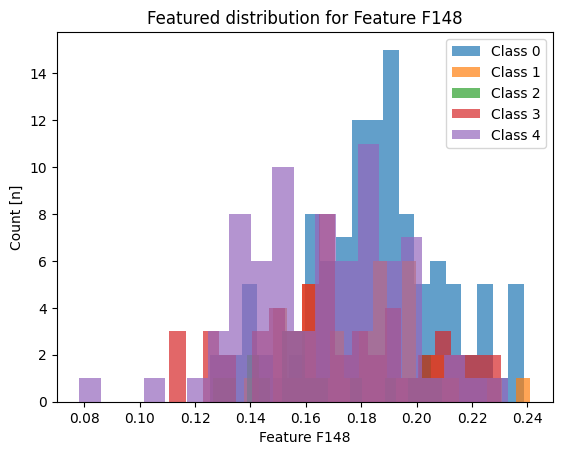

0.0001877901501938674 F152
2.0866916870649214e-05 F152
0.0001877901501938674 F152
8.838239314521109e-08 F152
9.137647976972554e-05 F152
2.0866916870649214e-05 F152
8.838239314521109e-08 F152
9.137647976972554e-05 F152


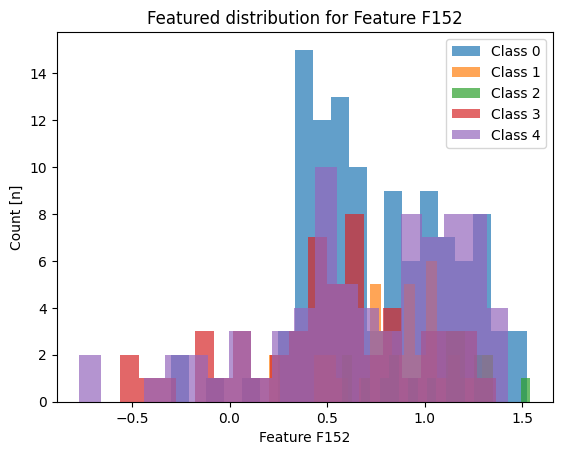

0.0002283610364643992 F153
4.119414985315378e-07 F153
0.00032051563139545047 F153
3.5470673862811645e-06 F153
0.0002283610364643992 F153
0.00032051563139545047 F153
4.119414985315378e-07 F153
3.5470673862811645e-06 F153


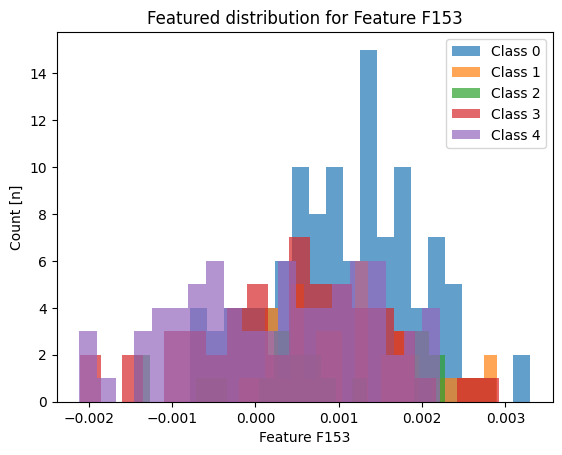

0.00015072280094995265 F154
0.00015072280094995265 F154


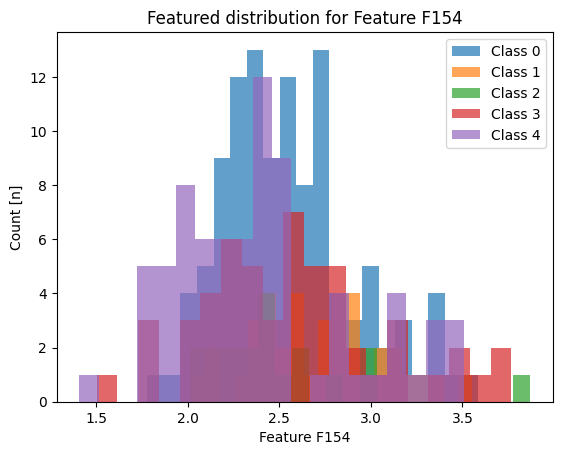

0.00046260432461228093 F155
0.00046260432461228093 F155


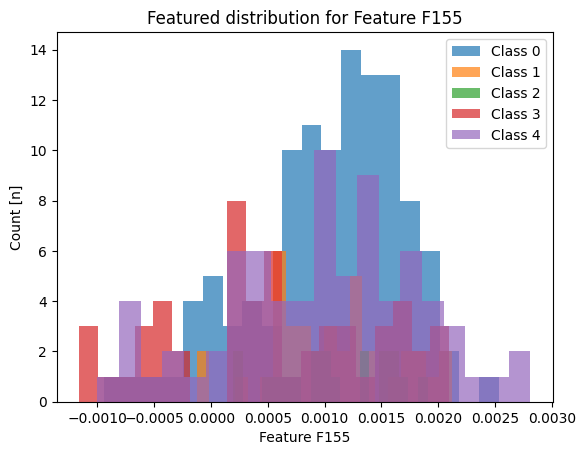

5.218758136202038e-05 F156
8.412374707625452e-05 F156
5.218758136202038e-05 F156
4.386681555773063e-06 F156
0.0007408574811560238 F156
8.412374707625452e-05 F156
4.386681555773063e-06 F156
0.0007408574811560238 F156


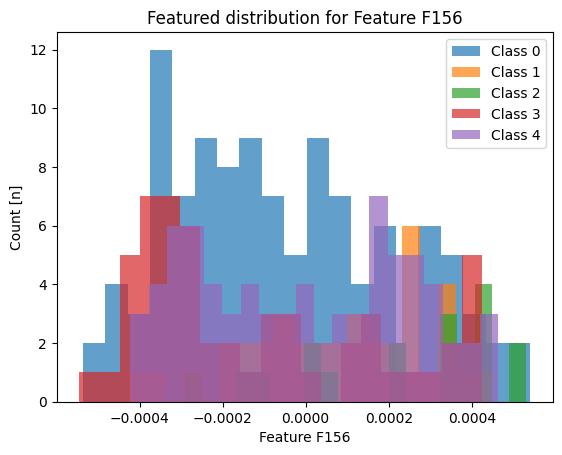

0.00014133849801726335 F157
0.00014133849801726335 F157


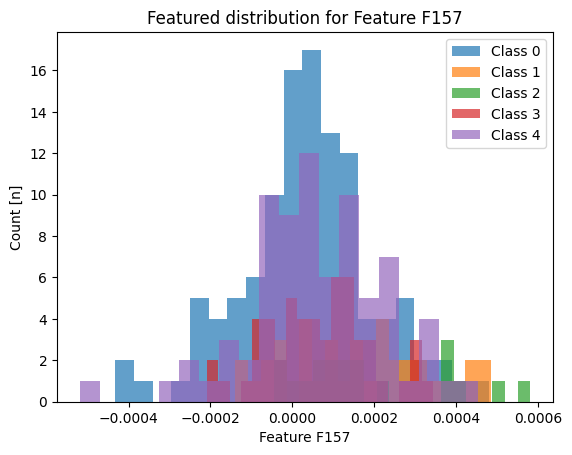

0.0008515515685088333 F158
0.00022703271131683075 F158
0.0008515515685088333 F158
0.000480827256914872 F158
0.0008166433186288353 F158
0.00022703271131683075 F158
8.71963162669115e-05 F158
0.00019728048490277086 F158
0.000480827256914872 F158
8.71963162669115e-05 F158
0.0008166433186288353 F158
0.00019728048490277086 F158


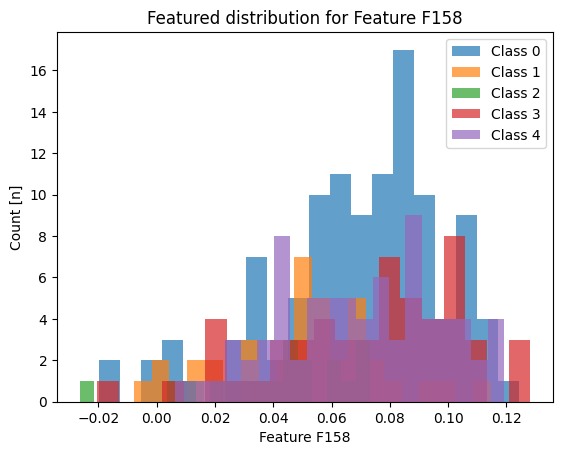

5.102092833338539e-06 F159
0.00028213283150398127 F159
5.102092833338539e-06 F159
0.00028213283150398127 F159
6.104261070574286e-06 F159
6.542200290493501e-06 F159
6.104261070574286e-06 F159
6.542200290493501e-06 F159


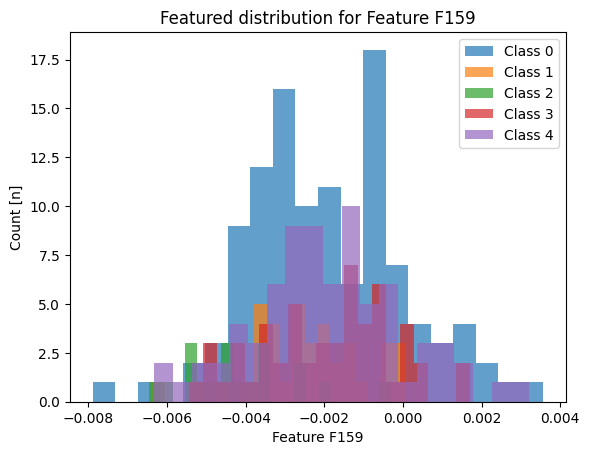

0.00031199708450710086 F161
5.961269719288256e-05 F161
0.00011474255864072878 F161
0.00031199708450710086 F161
5.961269719288256e-05 F161
0.00011474255864072878 F161


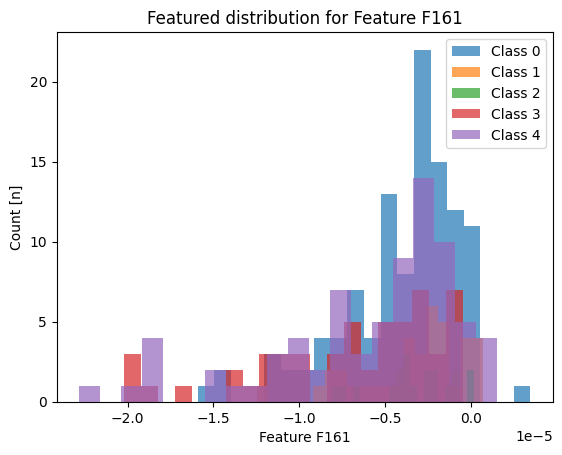

0.0003001496433804785 F163
0.0003001496433804785 F163


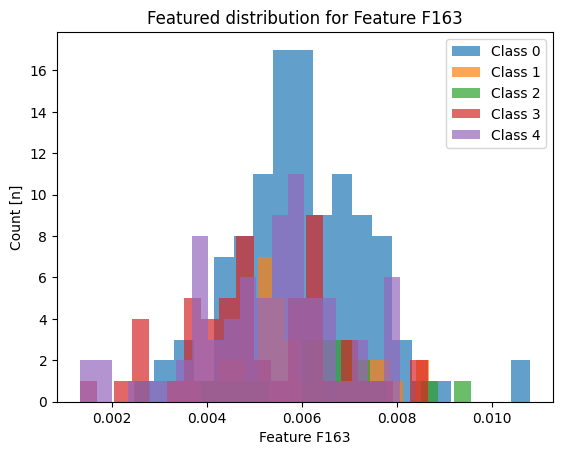

4.5983549282424175e-05 F164
4.5983549282424175e-05 F164
2.2151525409801873e-05 F164
2.2151525409801873e-05 F164


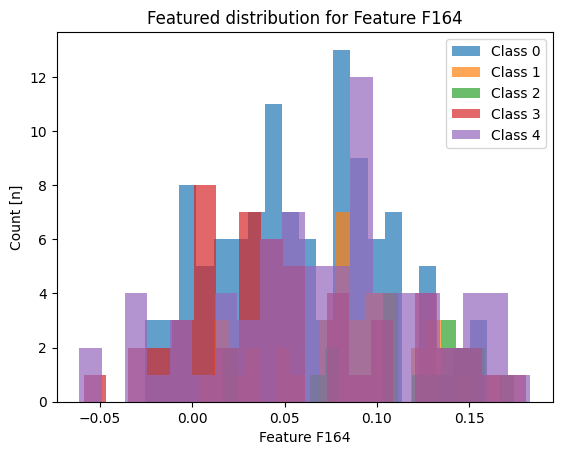

1.9899547883557672e-05 F169
1.9899547883557672e-05 F169


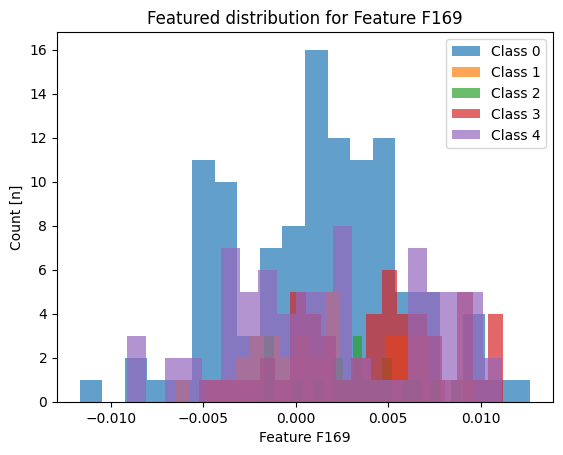

0.000251599309862862 F171
0.000251599309862862 F171


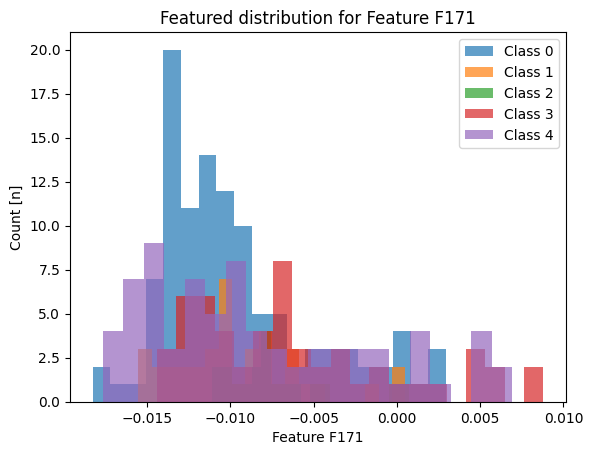

4.3594785072753134e-05 F174
4.3594785072753134e-05 F174
0.0001974576042890286 F174
1.3176312047546969e-05 F174
0.0001974576042890286 F174
1.3176312047546969e-05 F174


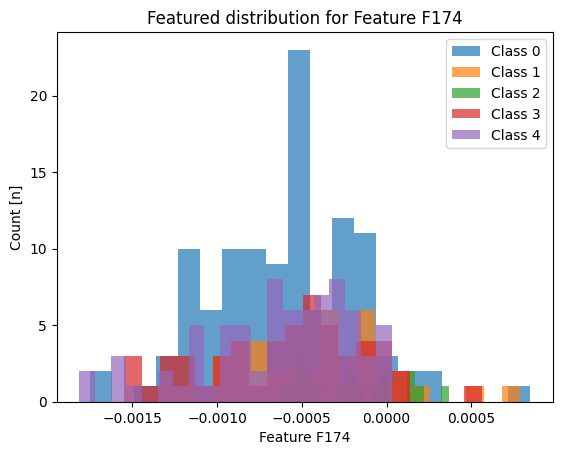

0.0005647937995643764 F177
0.0005647937995643764 F177
9.032907372710847e-06 F177
9.032907372710847e-06 F177


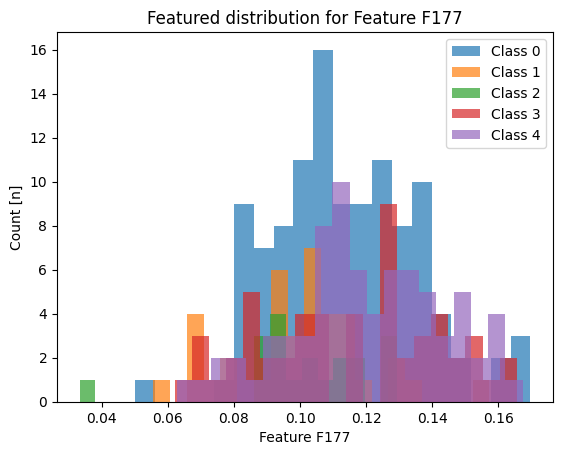

0.0001039120241069701 F178
0.0001039120241069701 F178
7.282762303649747e-07 F178
6.9548247563297824e-06 F178
0.0005181566201189233 F178
7.282762303649747e-07 F178
0.0005181566201189233 F178
6.9548247563297824e-06 F178


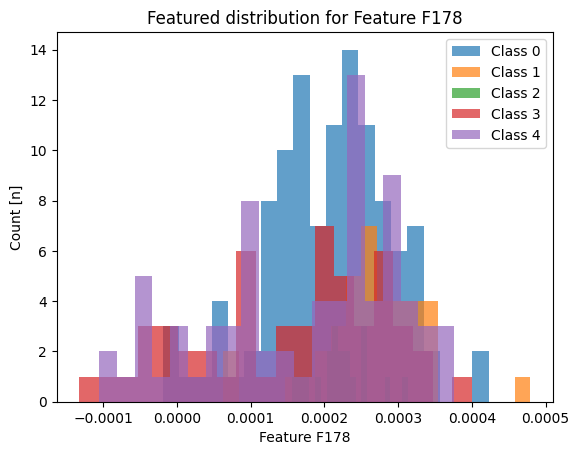

0.0002573828142396941 F182
0.0002573828142396941 F182


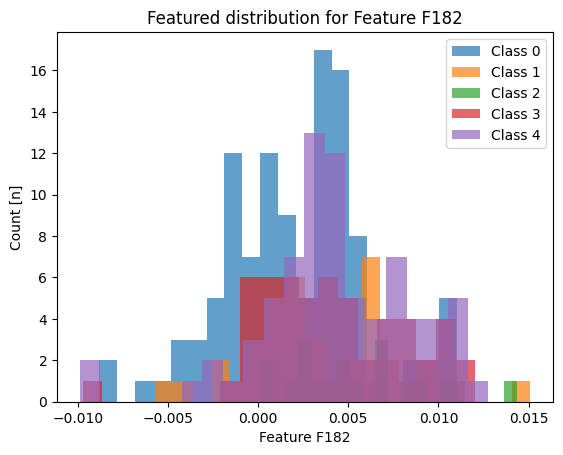

1.0431139956212e-06 F183
0.00045562696870678475 F183
1.0431139956212e-06 F183
4.872079269186555e-07 F183
4.930989179642882e-05 F183
0.00045562696870678475 F183
0.00010780867928317426 F183
4.872079269186555e-07 F183
0.00010780867928317426 F183
4.930989179642882e-05 F183


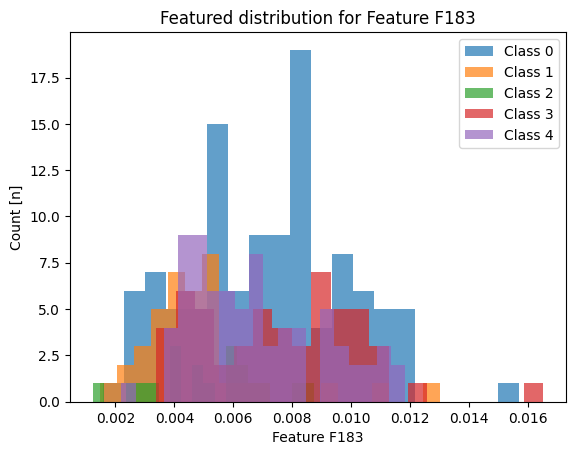

8.711687042490375e-05 F187
8.711687042490375e-05 F187
0.00020790001085298882 F187
0.00020790001085298882 F187


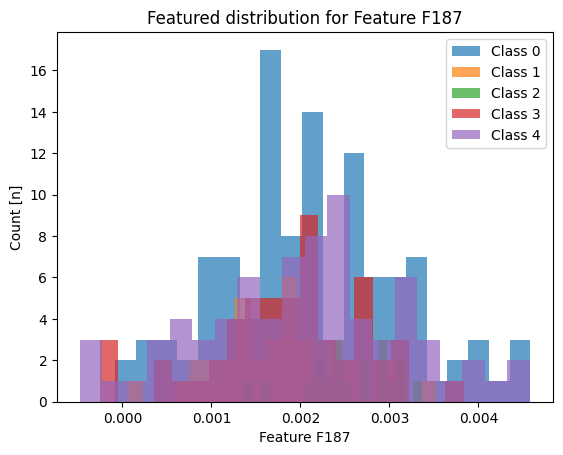

0.00047154674222153455 F188
0.00047154674222153455 F188


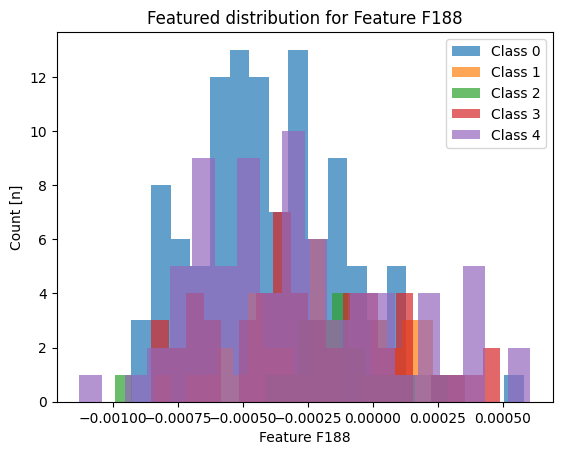

0.0003916175170766567 F190
0.0003916175170766567 F190
3.3365433040655475e-05 F190
1.7907526259101404e-05 F190
3.3365433040655475e-05 F190
1.7907526259101404e-05 F190


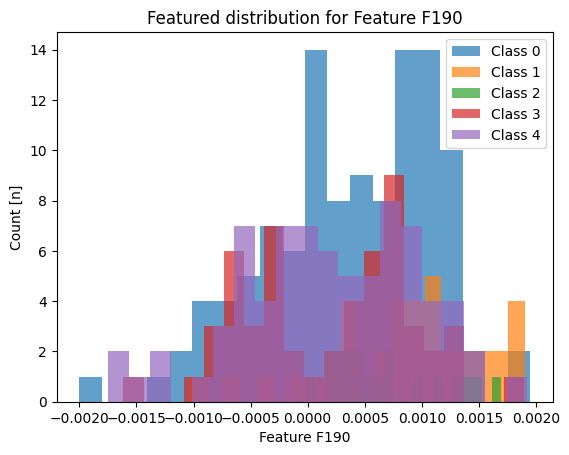

0.0002030190827969425 F191
0.0002030190827969425 F191
4.397939274539955e-08 F191
0.0006993418676826376 F191
1.4306027512512681e-06 F191
4.397939274539955e-08 F191
1.4306027512512681e-06 F191
0.0006993418676826376 F191


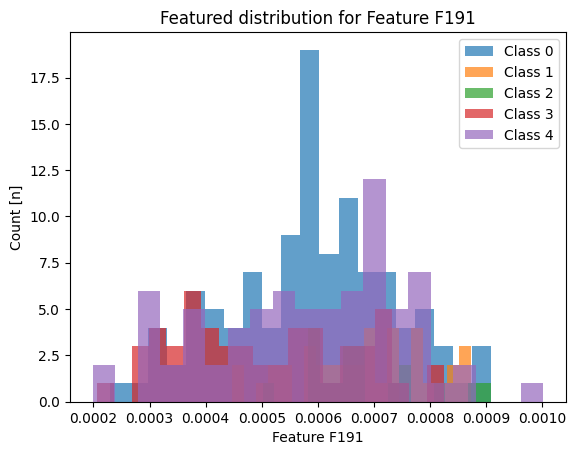

0.00013970872880255327 F192
0.00013970872880255327 F192


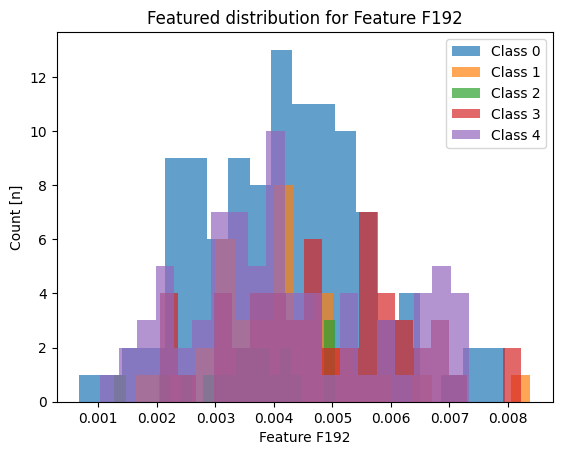

5.740779849553899e-06 F193
1.2492703864993422e-05 F193
5.740779849553899e-06 F193
1.2492703864993422e-05 F193


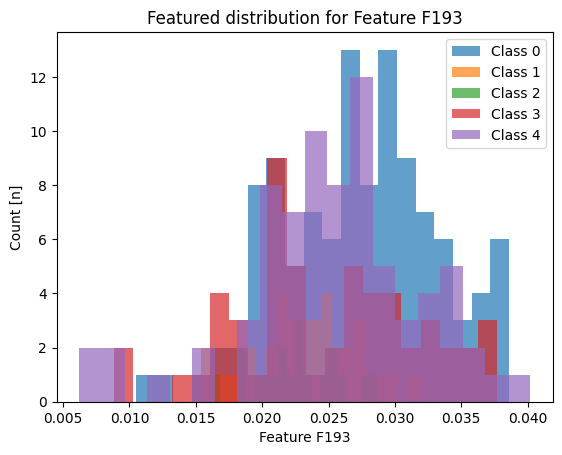

8.396620759410045e-05 F197
8.396620759410045e-05 F197


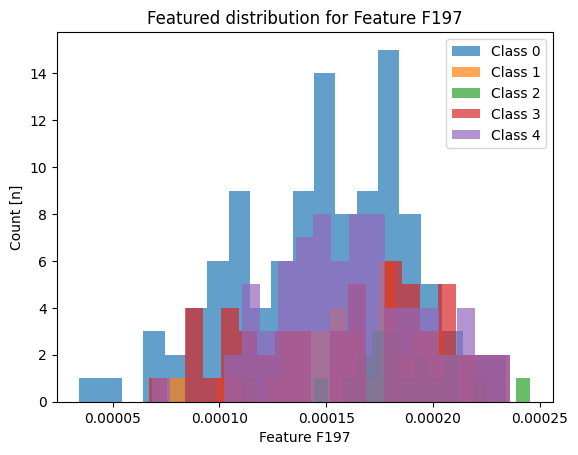

4.035696086808275e-05 F200
4.035696086808275e-05 F200


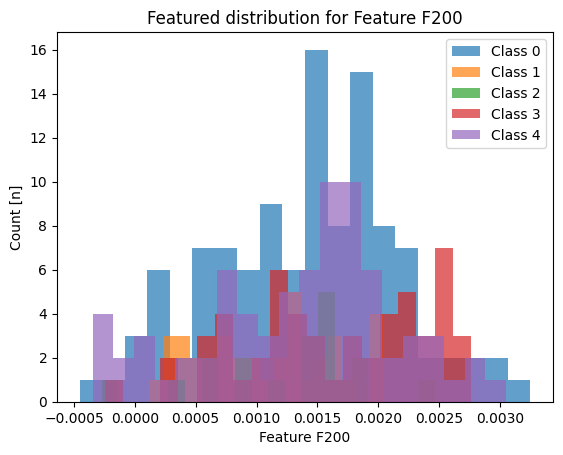

0.00047499520904973144 F201
0.00031560508572591313 F201
0.00047499520904973144 F201
5.361644902028412e-05 F201
0.00031560508572591313 F201
5.361644902028412e-05 F201
0.00017249435292606774 F201
0.00017249435292606774 F201


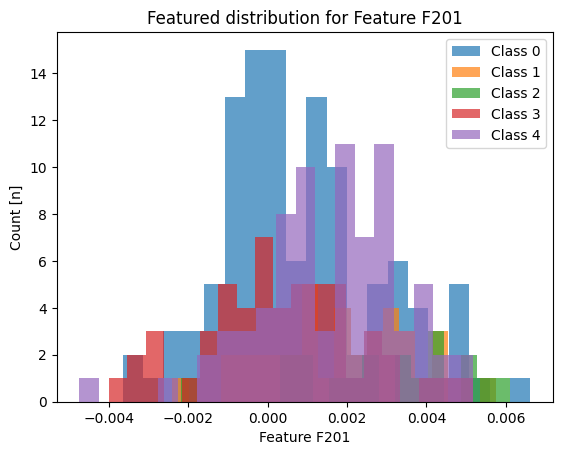

0.000204231924157929 F202
0.000204231924157929 F202
0.0008990891611274015 F202
0.0008990891611274015 F202


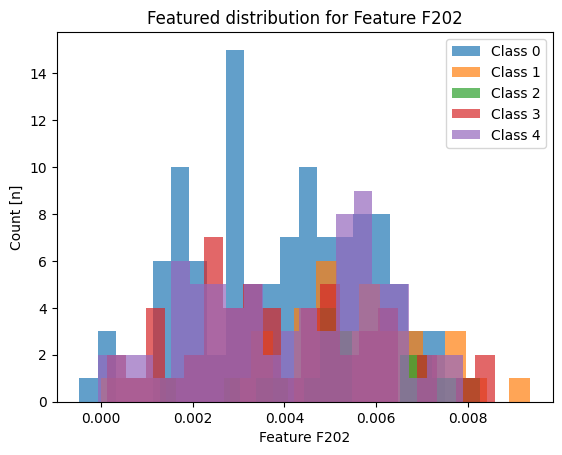

3.3010379271157596e-06 F203
3.3010379271157596e-06 F203
1.3949324896692829e-06 F203
1.1125374675506136e-07 F203
1.3949324896692829e-06 F203
1.1125374675506136e-07 F203


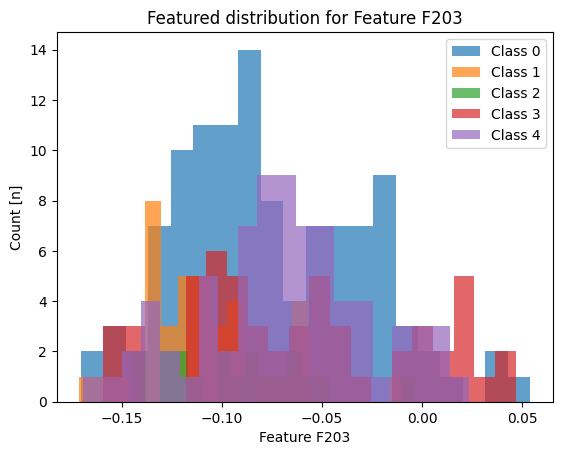

5.0199285008214266e-05 F205
5.0199285008214266e-05 F205
9.6748868457583e-05 F205
0.0004516718169194222 F205
9.6748868457583e-05 F205
0.0004516718169194222 F205


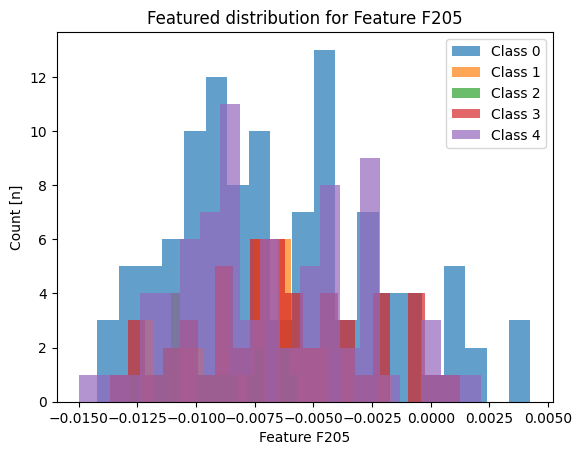

4.039322246990272e-06 F206
5.660938230832952e-11 F206
4.039322246990272e-06 F206
6.1169184320847226e-06 F206
0.00034943699565637436 F206
5.660938230832952e-11 F206
1.2633472331500233e-10 F206
4.654428679911773e-09 F206
6.1169184320847226e-06 F206
1.2633472331500233e-10 F206
0.00034943699565637436 F206
4.654428679911773e-09 F206


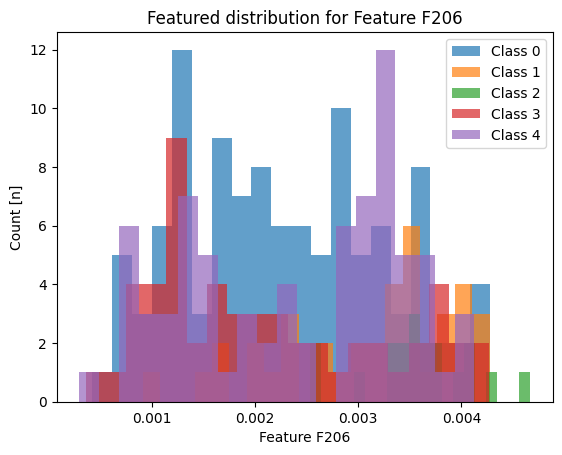

4.9067766373602555e-05 F207
4.9067766373602555e-05 F207
2.2593372167872765e-05 F207
0.00014822224110380737 F207
2.2593372167872765e-05 F207
0.00014822224110380737 F207


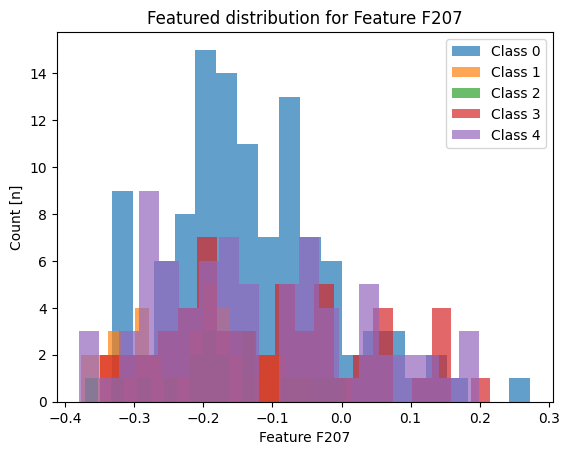

1.9639262122511137e-06 F210
2.0108388457100208e-05 F210
1.9639262122511137e-06 F210
2.0108388457100208e-05 F210


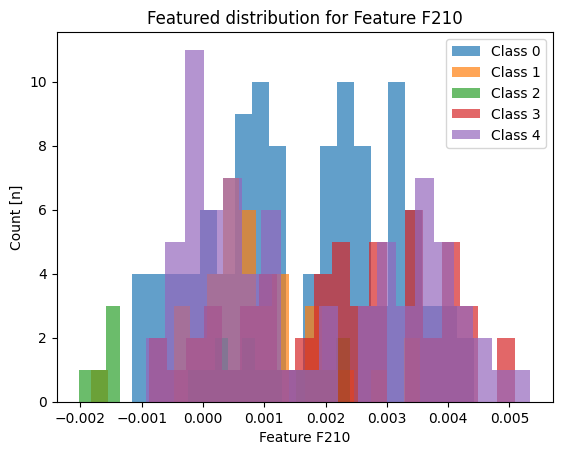

0.0006631680614913006 F212
0.0006631680614913006 F212


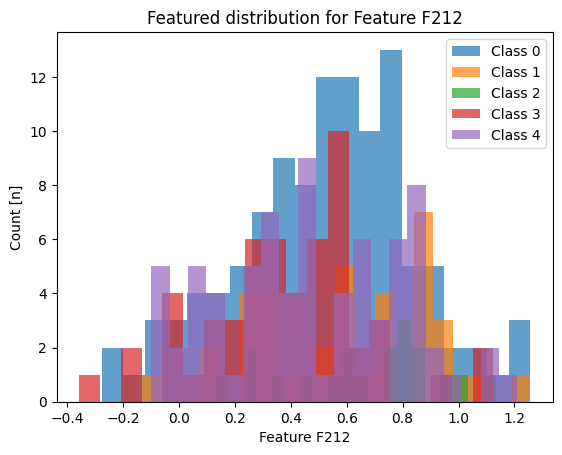

0.0002057213701951598 F213
0.0002057213701951598 F213


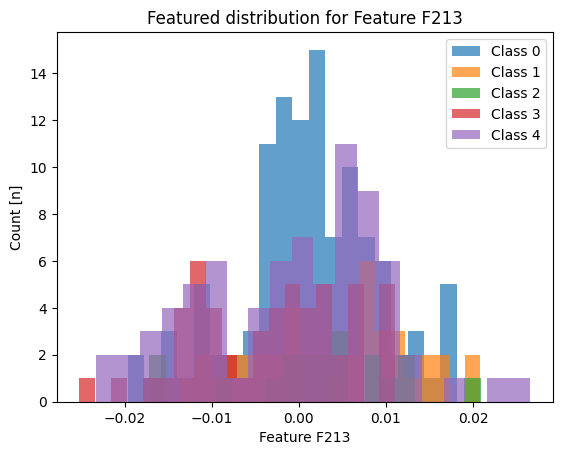

7.743680019652217e-05 F217
0.00014361496637366078 F217
7.743680019652217e-05 F217
4.4304047764012986e-07 F217
0.0006032259461533715 F217
0.00014361496637366078 F217
4.4304047764012986e-07 F217
0.0006032259461533715 F217


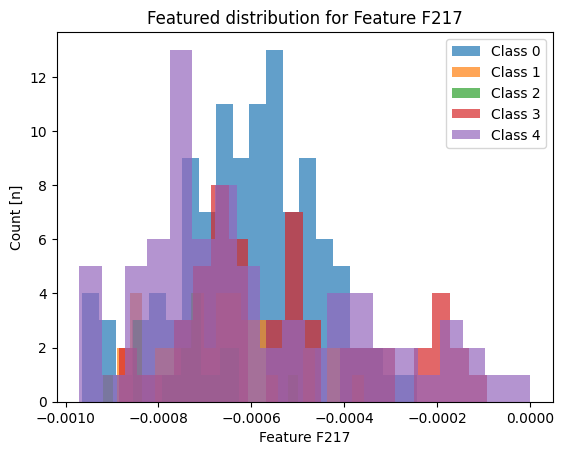

0.0001596771993250899 F220
0.00020321564503565252 F220
1.4894831481693746e-05 F220
0.0007260472272409477 F220
1.0446788855357001e-05 F220
0.0001596771993250899 F220
1.4894831481693746e-05 F220
0.0007260472272409477 F220
0.00020321564503565252 F220
1.0446788855357001e-05 F220


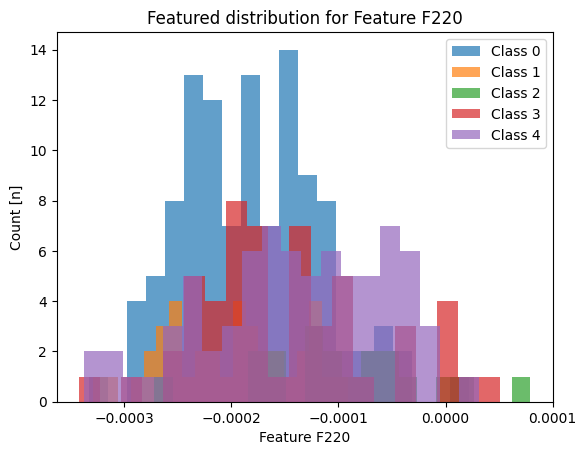

5.397580196357817e-05 F221
5.397580196357817e-05 F221
7.0024152160300555e-06 F221
7.0024152160300555e-06 F221


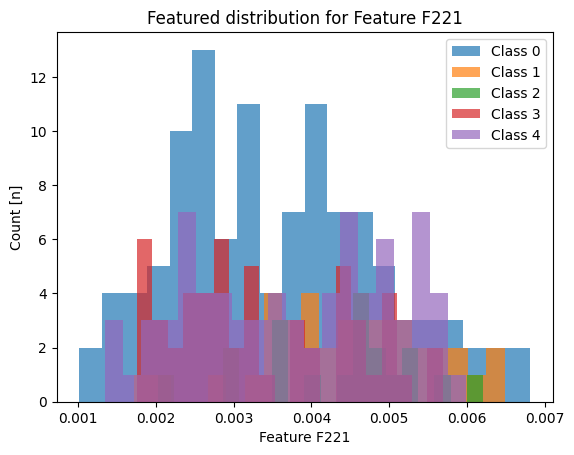

9.975306749968414e-08 F222
0.0006314757234115702 F222
0.00022286379349986007 F222
9.975306749968414e-08 F222
1.794585860733445e-08 F222
3.0271083681250503e-09 F222
0.0006314757234115702 F222
1.794585860733445e-08 F222
0.00022286379349986007 F222
3.0271083681250503e-09 F222


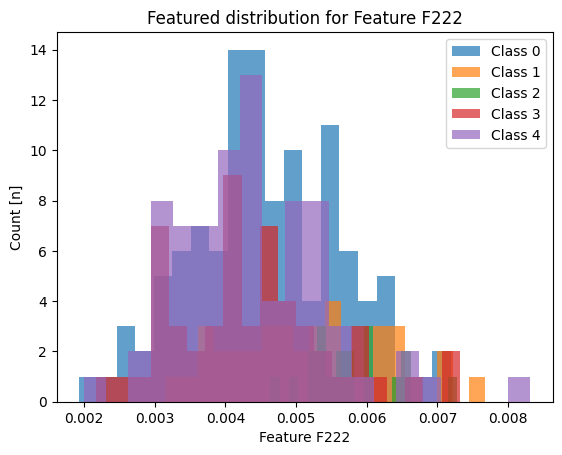

1.45503912574985e-06 F223
0.00010499070405364464 F223
1.45503912574985e-06 F223
0.00010499070405364464 F223
1.74375253902803e-07 F223
0.00019449591305723113 F223
1.74375253902803e-07 F223
0.00019449591305723113 F223


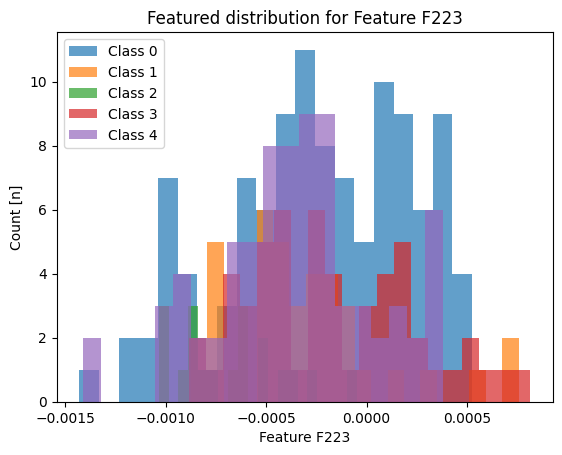

0.0008121822110741517 F224
0.0009018283855184126 F224
0.0007498645219022953 F224
0.0009018283855184126 F224
0.0008121822110741517 F224
0.0007498645219022953 F224


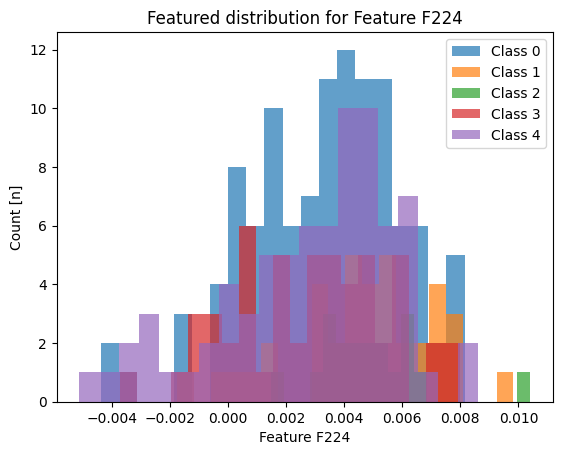

5.1538770434841406e-05 F226
5.1538770434841406e-05 F226
6.998897027620601e-05 F226
3.031902653933884e-05 F226
6.998897027620601e-05 F226
3.031902653933884e-05 F226


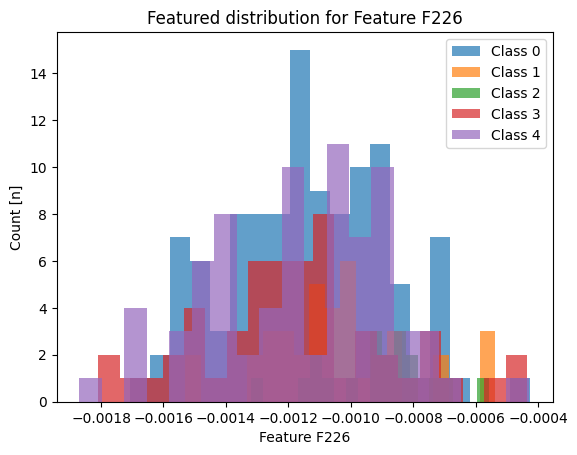

0.00030022353289771376 F228
0.00011232947030067204 F228
0.00030022353289771376 F228
0.00011232947030067204 F228
0.00026318453801576884 F228
0.0003884300678832336 F228
0.00026318453801576884 F228
0.0003884300678832336 F228


9.592328529682944e-06 F229
0.000403094601319477 F229
9.592328529682944e-06 F229
2.7482960648547967e-07 F229
9.435092540096169e-05 F229
0.000403094601319477 F229
2.7482960648547967e-07 F229
9.435092540096169e-05 F229


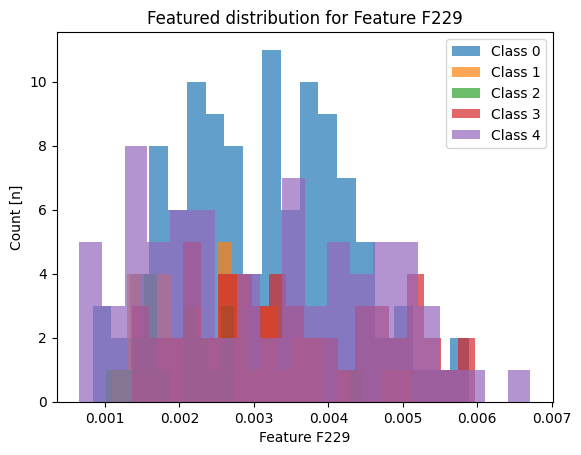

3.0309433307851576e-08 F231
0.0004493099569949724 F231
9.718375574410417e-05 F231
3.0309433307851576e-08 F231
9.718375574410417e-05 F231
4.729600505755056e-06 F231
0.0001400773644315499 F231
4.729600505755056e-06 F231
0.0004493099569949724 F231
0.0001400773644315499 F231


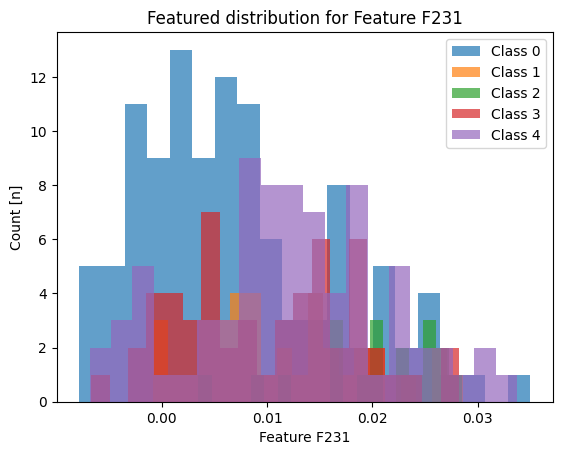

1.8893821426664068e-05 F232
2.644613074203474e-06 F232
1.8893821426664068e-05 F232
1.9870274555972776e-08 F232
3.090406482653067e-05 F232
2.644613074203474e-06 F232
1.9870274555972776e-08 F232
3.090406482653067e-05 F232


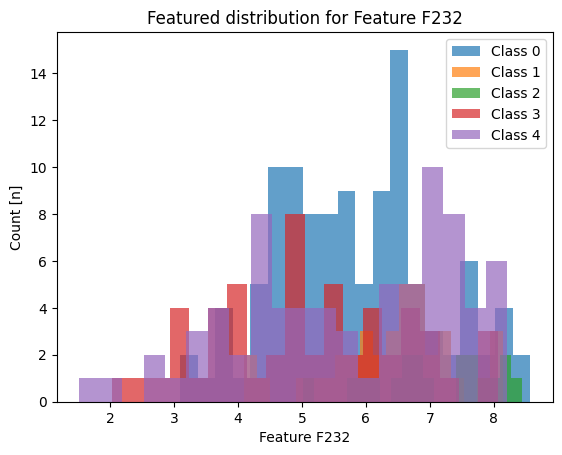

0.0009786291283971037 F233
8.858693312840204e-06 F233
1.7796699546820953e-05 F233
0.0009786291283971037 F233
8.858693312840204e-06 F233
1.7796699546820953e-05 F233


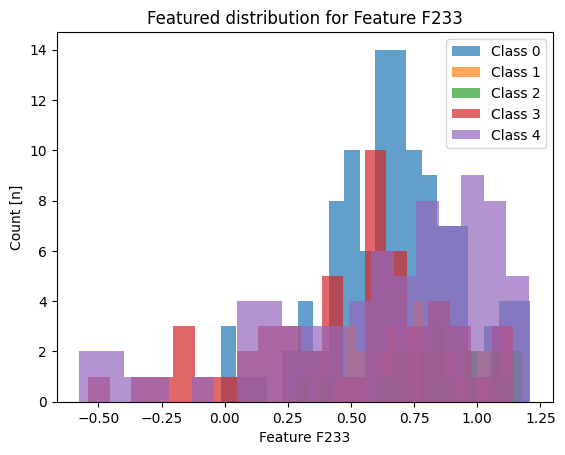

0.0009698251736727947 F234
6.386476730644781e-05 F234
0.0009698251736727947 F234
6.386476730644781e-05 F234


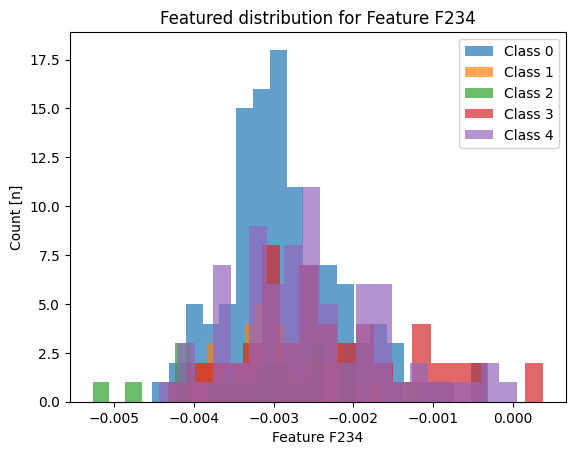

3.846706339730381e-05 F238
3.846706339730381e-05 F238


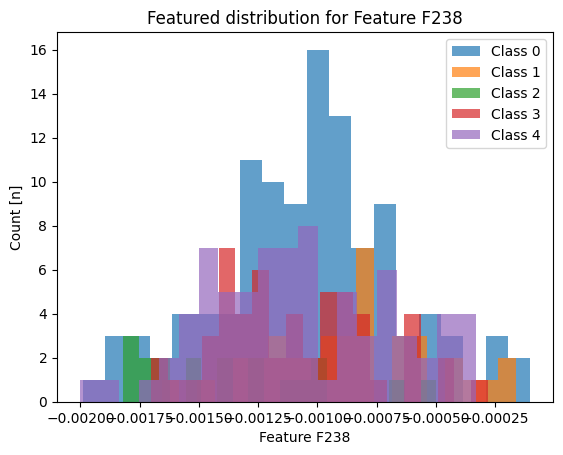

7.175860219148598e-05 F240
7.258727707996385e-07 F240
7.175860219148598e-05 F240
1.6332478020172913e-05 F240
7.258727707996385e-07 F240
1.4014771252435628e-07 F240
7.78141694508055e-06 F240
1.6332478020172913e-05 F240
1.4014771252435628e-07 F240
7.78141694508055e-06 F240


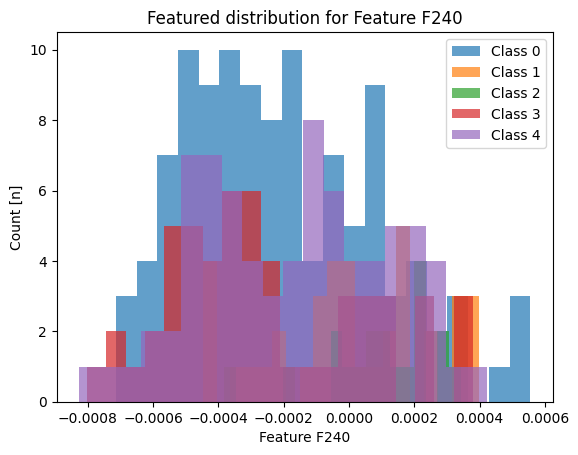

0.00077584659849067 F241
0.0009608215738037957 F241
0.00077584659849067 F241
0.0003618455836807601 F241
1.7702787420414588e-07 F241
0.0003618455836807601 F241
0.0009608215738037957 F241
1.7702787420414588e-07 F241


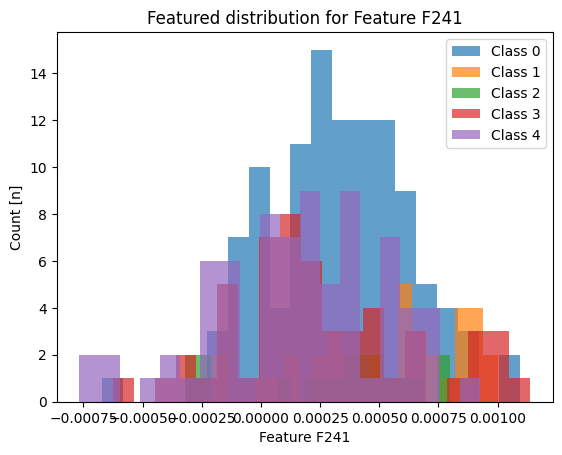

0.00012276152981436427 F242
0.00012276152981436427 F242
0.0006474231762907443 F242
0.0005559195504520453 F242
0.0006474231762907443 F242
0.0005559195504520453 F242


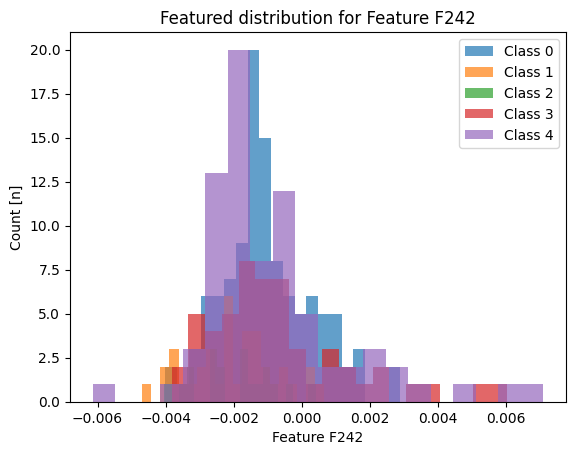

5.758214348765902e-05 F245
5.758214348765902e-05 F245


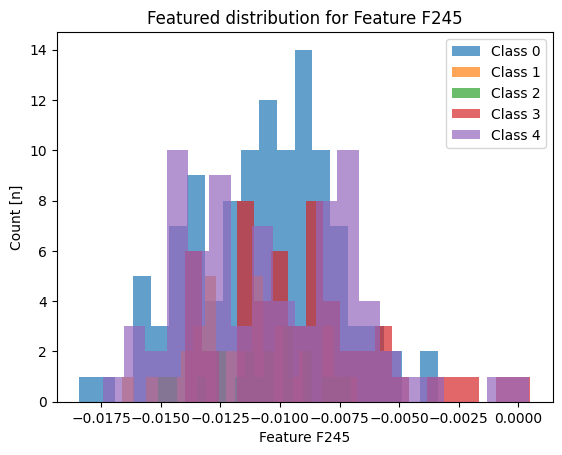

2.1568171370082008e-07 F246
0.00013423382611125778 F246
2.1568171370082008e-07 F246
3.935897334392646e-06 F246
0.00013423382611125778 F246
0.0002612517963932397 F246
3.935897334392646e-06 F246
0.0002612517963932397 F246


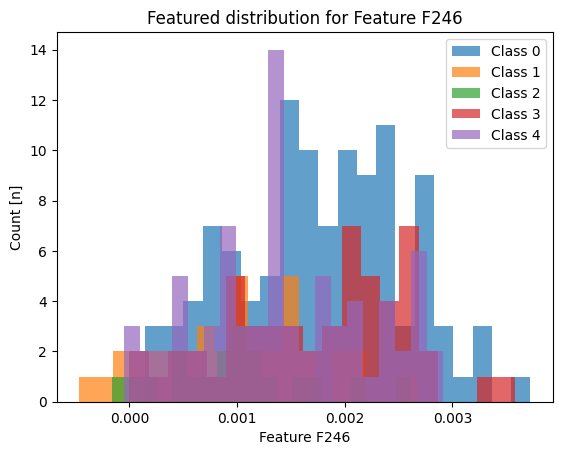

0.0007344572372163826 F247
0.0007344572372163826 F247


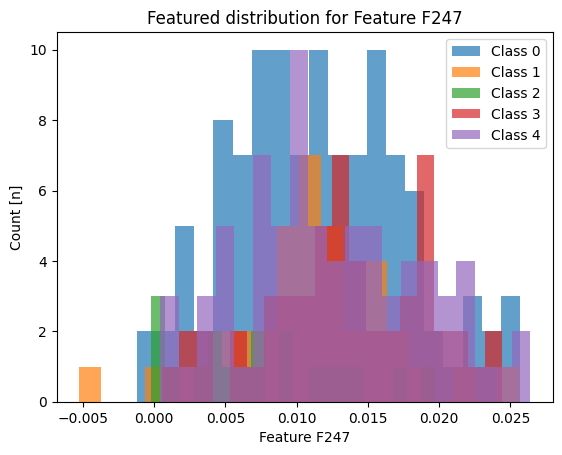

0.0003457921122169411 F248
0.0003457921122169411 F248
5.3634685841420726e-05 F248
0.0005722049849368625 F248
5.3634685841420726e-05 F248
0.0005722049849368625 F248


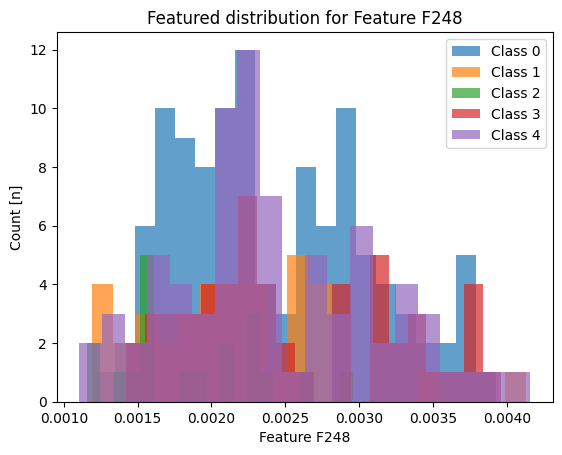

0.0009657685369067831 F249
0.0009657685369067831 F249


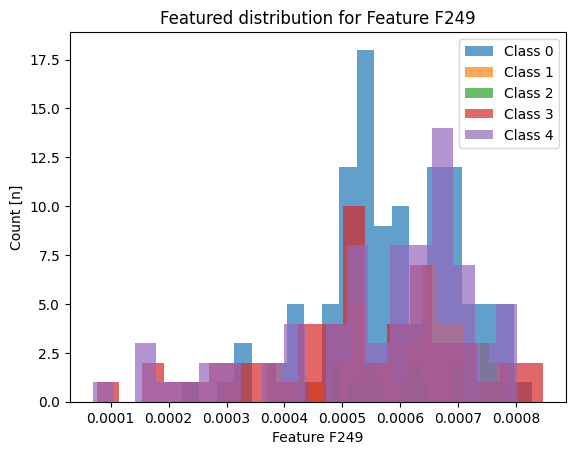

9.277961783787773e-05 F250
9.277961783787773e-05 F250
1.7476607970570877e-05 F250
1.7476607970570877e-05 F250


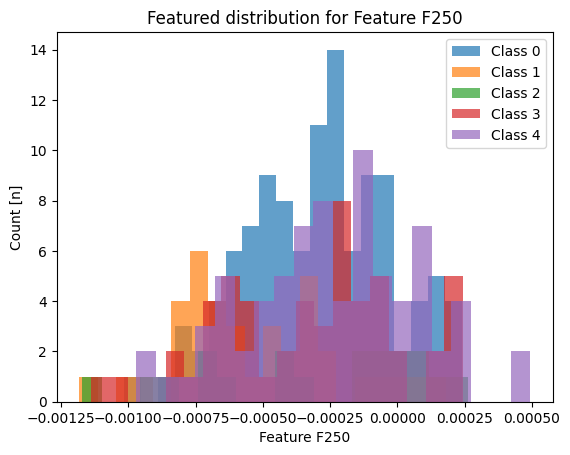

6.653860545436334e-05 F251
6.653860545436334e-05 F251


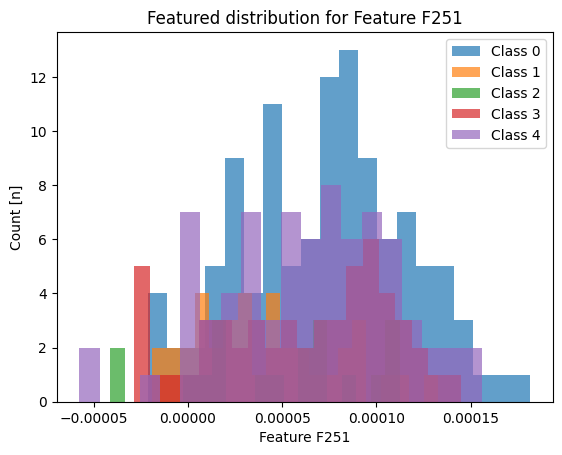

0.00034471834248091303 F252
0.00034471834248091303 F252


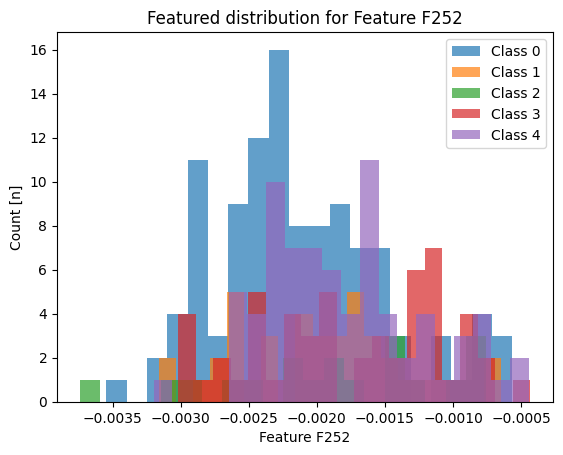

0.0004678764186768052 F253
0.0004989951619903474 F253
0.0004678764186768052 F253
0.0004989951619903474 F253


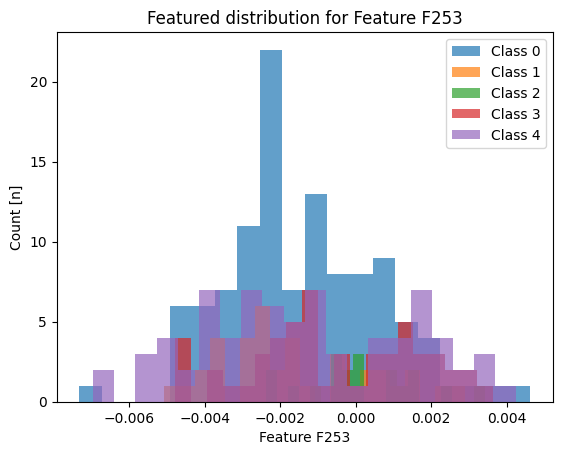

0.000139676316110992 F255
2.540672730234509e-06 F255
0.0009206793535389326 F255
0.000139676316110992 F255
0.0005235396990787986 F255
2.540672730234509e-06 F255
0.0009206793535389326 F255
0.0005235396990787986 F255


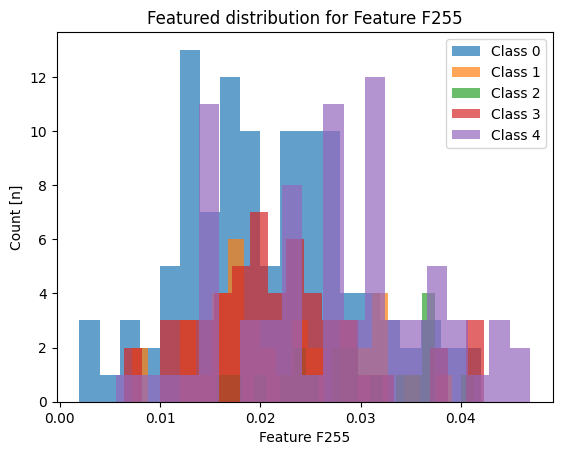

0.00023873161181084697 F257
0.0002485683927151195 F257
0.00023873161181084697 F257
1.0597371099905352e-06 F257
0.0002485683927151195 F257
1.0597371099905352e-06 F257


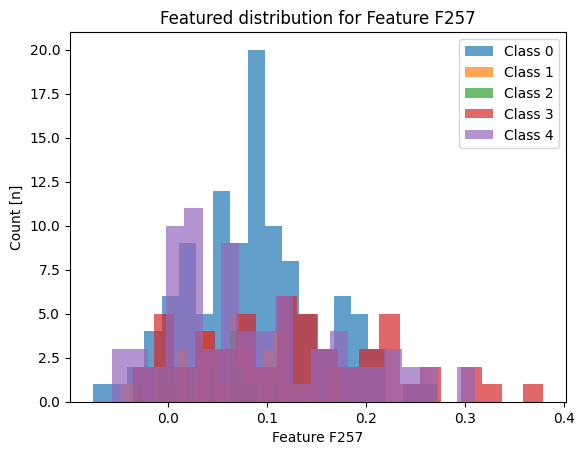

8.306617784608841e-05 F259
2.4265809813220668e-05 F259
8.306617784608841e-05 F259
2.4265809813220668e-05 F259
8.844395883246077e-05 F259
8.844395883246077e-05 F259


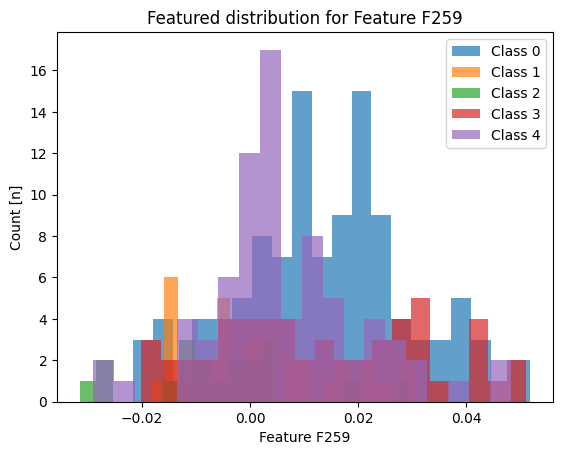

6.832632569452683e-05 F260
0.00022499014934921293 F260
0.0009212961660523545 F260
6.832632569452683e-05 F260
0.0009212961660523545 F260
0.00022499014934921293 F260


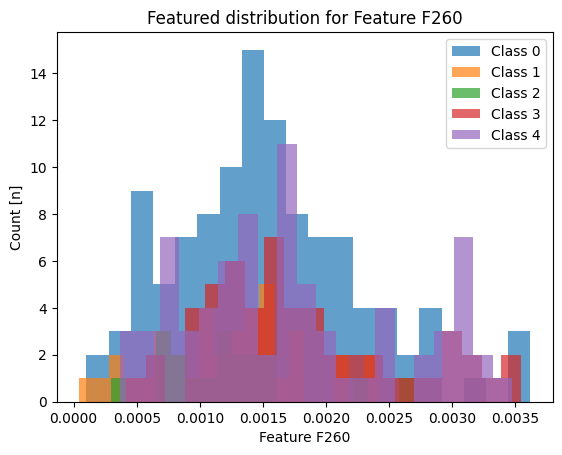

1.7289110280395896e-05 F263
1.7289110280395896e-05 F263


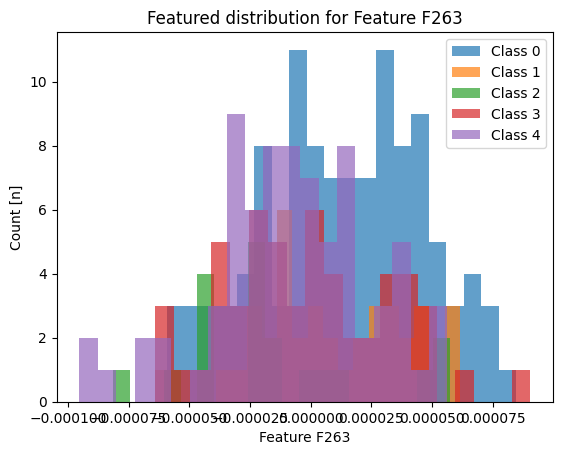

7.998476804243288e-10 F264
1.741934562883722e-05 F264
7.998476804243288e-10 F264
1.741934562883722e-05 F264
7.346831905197665e-10 F264
3.472512881056834e-10 F264
7.346831905197665e-10 F264
3.472512881056834e-10 F264


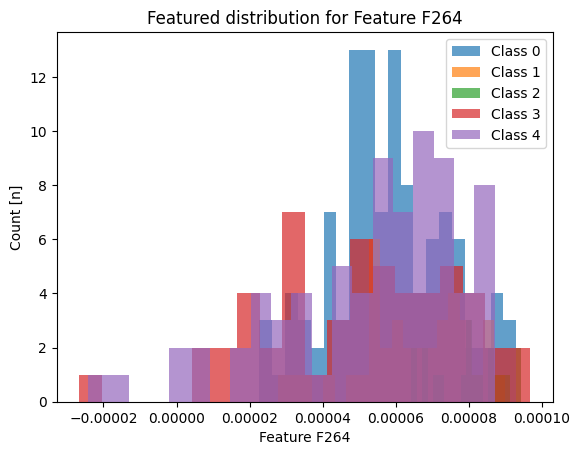

0.00042498670084274454 F265
0.00042498670084274454 F265


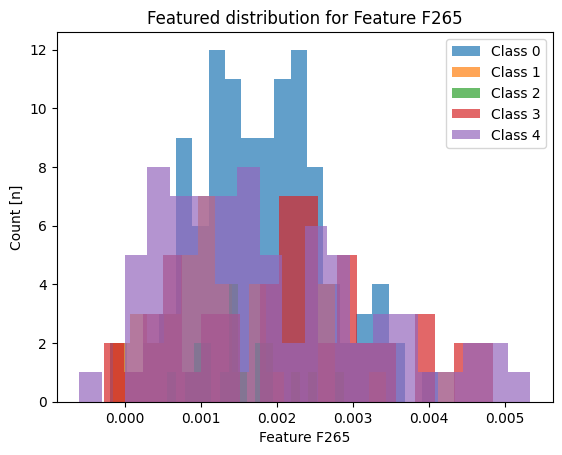

0.00026880451712346426 F266
0.00026880451712346426 F266
4.7000116912588196e-05 F266
0.00015791244308845597 F266
4.7000116912588196e-05 F266
0.00015791244308845597 F266


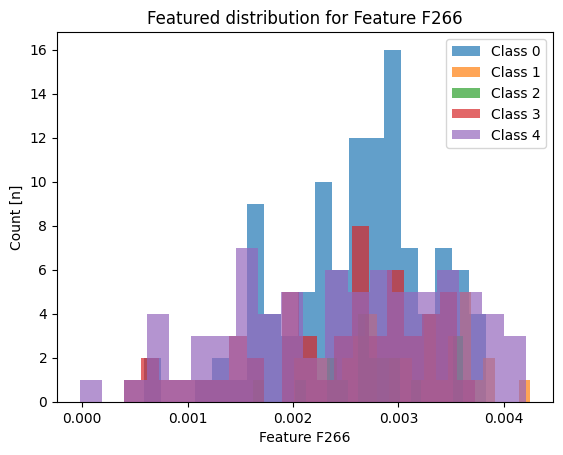

0.00047696631051840304 F267
0.00037599634714971405 F267
0.00047696631051840304 F267
0.00037599634714971405 F267


0.00013370894709837988 F268
0.00013370894709837988 F268
0.00032120590851209593 F268
0.00032120590851209593 F268


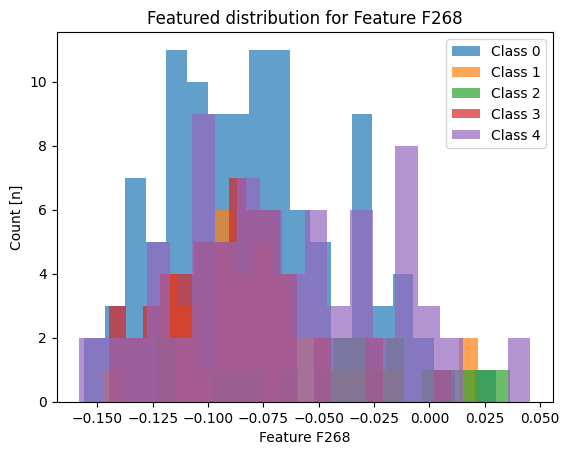

0.000261901233160411 F270
0.000261901233160411 F270
0.00016288058371099893 F270
0.00016288058371099893 F270


8.704157266383788e-05 F271
8.704157266383788e-05 F271
1.898437890247826e-06 F271
1.898437890247826e-06 F271


0.0005006606734442989 F272
0.0005006606734442989 F272
3.2556370580053885e-05 F272
0.0006446850485387274 F272
3.2556370580053885e-05 F272
0.0006446850485387274 F272


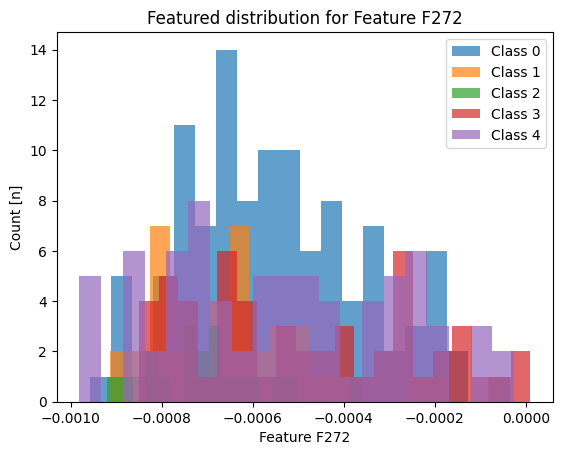

2.900317498025688e-05 F273
0.0008217710397216073 F273
2.900317498025688e-05 F273
5.439660268197441e-07 F273
8.172350648503808e-05 F273
0.0008217710397216073 F273
5.439660268197441e-07 F273
8.172350648503808e-05 F273


3.688233388789679e-05 F274
0.00014833479018166174 F274
3.688233388789679e-05 F274
4.215980964539687e-06 F274
5.768300415480412e-05 F274
0.00014833479018166174 F274
2.174278842401544e-05 F274
0.00014020078791792136 F274
4.215980964539687e-06 F274
2.174278842401544e-05 F274
5.768300415480412e-05 F274
0.00014020078791792136 F274


4.492638516755445e-05 F275
0.0005657176796763681 F275
1.6873651373400023e-07 F275
4.492638516755445e-05 F275
4.1516304722027024e-05 F275
1.1102972802754665e-08 F275
4.1516304722027024e-05 F275
0.0005657176796763681 F275
1.6873651373400023e-07 F275
1.1102972802754665e-08 F275


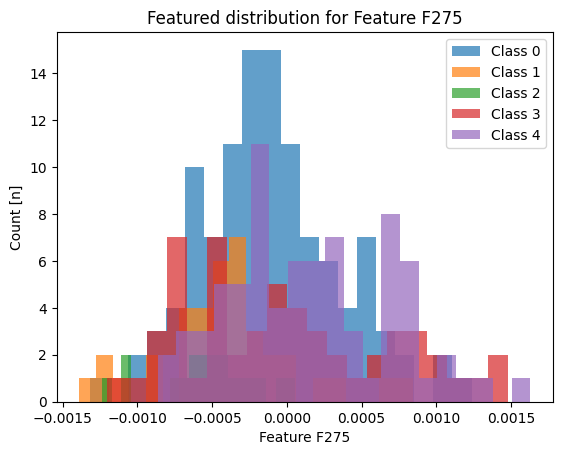

2.3733415233522792e-05 F276
2.3733415233522792e-05 F276
0.0003869598169421844 F276
2.3508111827557263e-07 F276
0.0003869598169421844 F276
2.3508111827557263e-07 F276


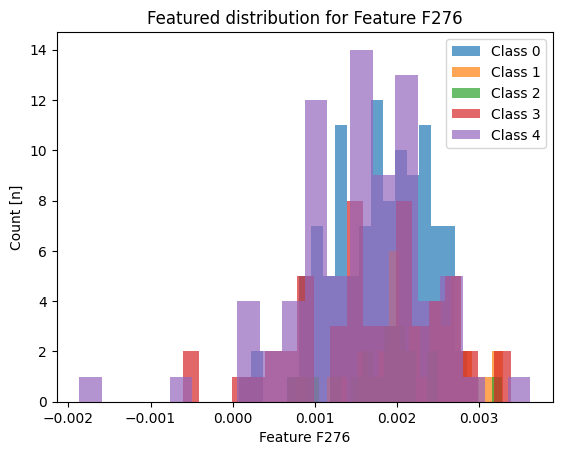

0.0001786062009098203 F277
0.0001786062009098203 F277


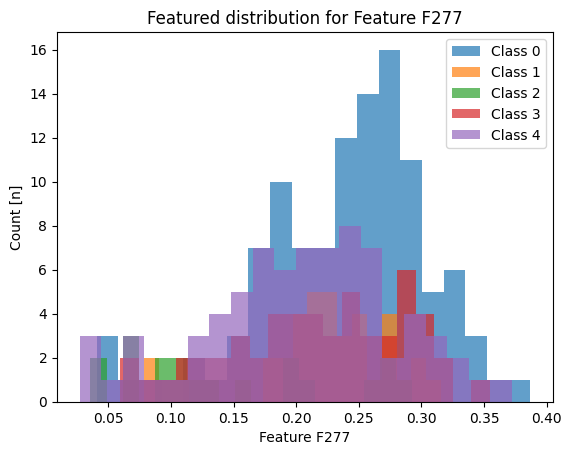

1.0950000130151952e-05 F278
0.00019676052512776889 F278
0.00043328171749621304 F278
1.0950000130151952e-05 F278
0.00019676052512776889 F278
0.00043328171749621304 F278


0.0009715332058795083 F279
0.0009715332058795083 F279


1.4791108667245097e-05 F280
6.583237019841397e-05 F280
1.4791108667245097e-05 F280
6.583237019841397e-05 F280


0.0006473829234165172 F281
0.0006473829234165172 F281


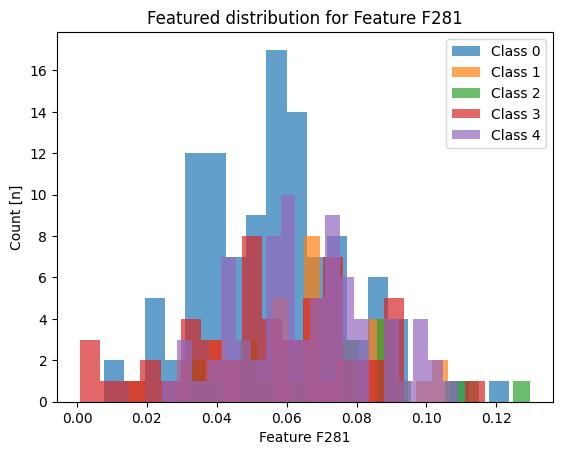

8.761002969259014e-06 F283
8.761002969259014e-06 F283
0.00025387629960385306 F283
0.00025387629960385306 F283


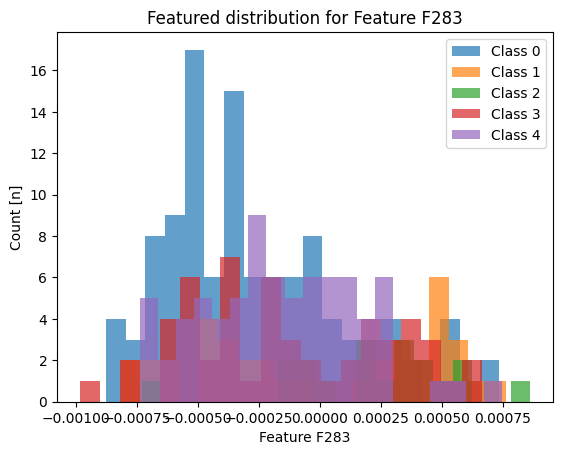

2.289478922565568e-06 F286
2.289478922565568e-06 F286
2.104723663805717e-06 F286
0.000983721025806732 F286
2.104723663805717e-06 F286
0.000983721025806732 F286


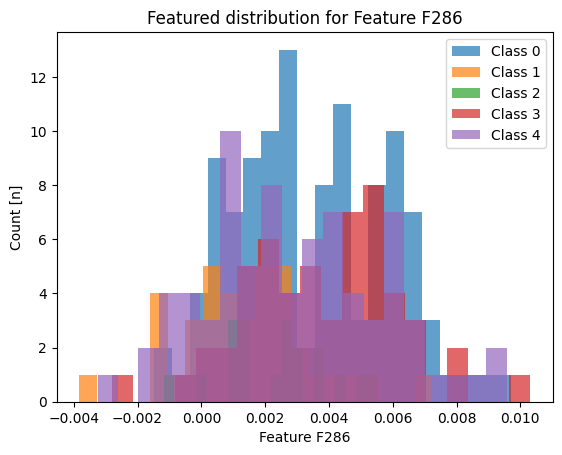

0.00014413237959482838 F287
3.7493948455225106e-05 F287
0.0003778850044621665 F287
0.00022076034140346626 F287
0.00014413237959482838 F287
0.0003778850044621665 F287
3.7493948455225106e-05 F287
0.00022076034140346626 F287


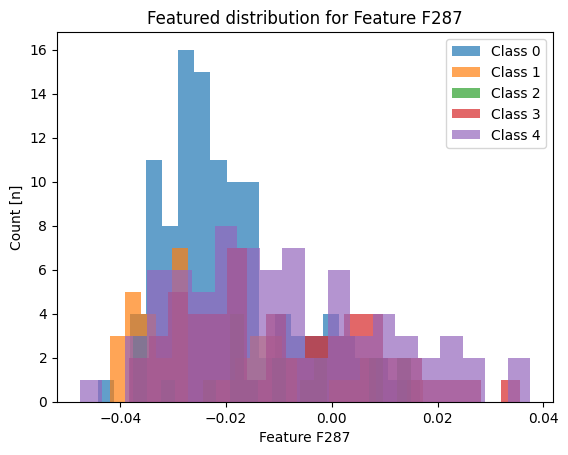

0.000646178612219882 F288
0.000646178612219882 F288
3.6404744416890813e-05 F288
3.6404744416890813e-05 F288


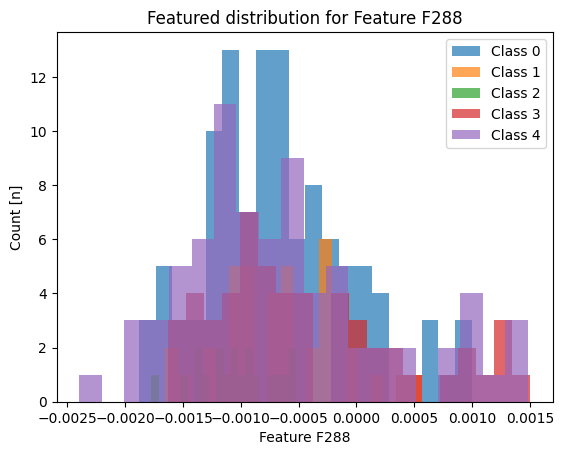

0.0009352689889120394 F289
2.698907965161765e-05 F289
0.0009352689889120394 F289
2.698907965161765e-05 F289


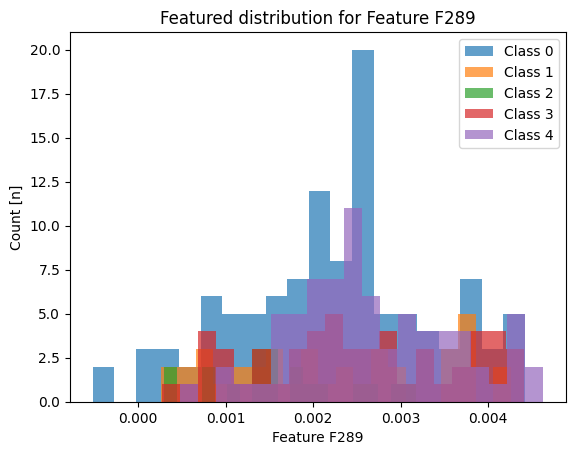

0.00028943226945615634 F290
0.00028943226945615634 F290


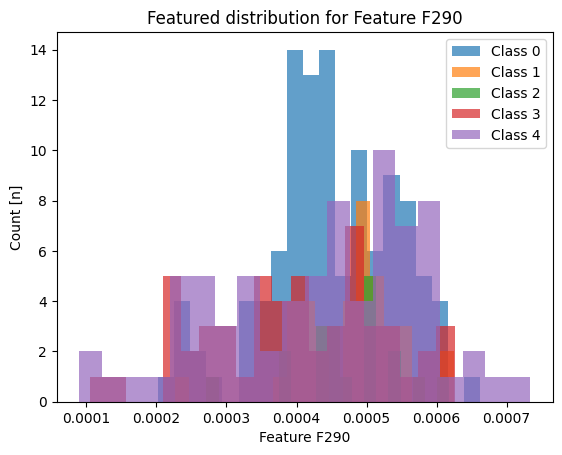

2.7140167162045217e-05 F291
0.0002749950774794323 F291
6.150675400242769e-06 F291
2.7140167162045217e-05 F291
2.8441282941201544e-08 F291
1.1042192400070797e-05 F291
0.0002749950774794323 F291
6.150675400242769e-06 F291
2.8441282941201544e-08 F291
1.1042192400070797e-05 F291


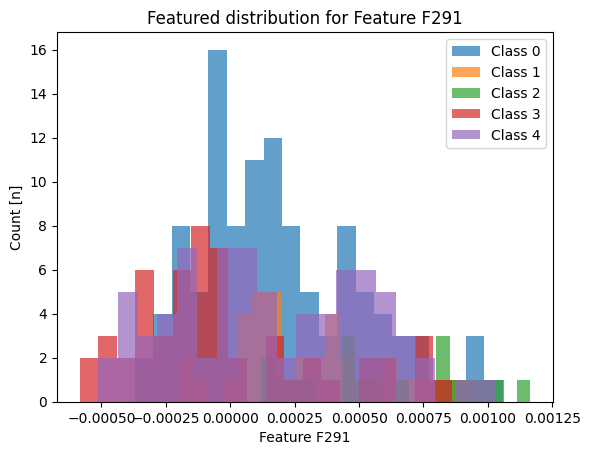

2.2423948102771448e-05 F293
0.0006458360600450576 F293
2.2423948102771448e-05 F293
3.2408510246779685e-06 F293
7.406965754518162e-05 F293
0.0006458360600450576 F293
3.2408510246779685e-06 F293
7.406965754518162e-05 F293


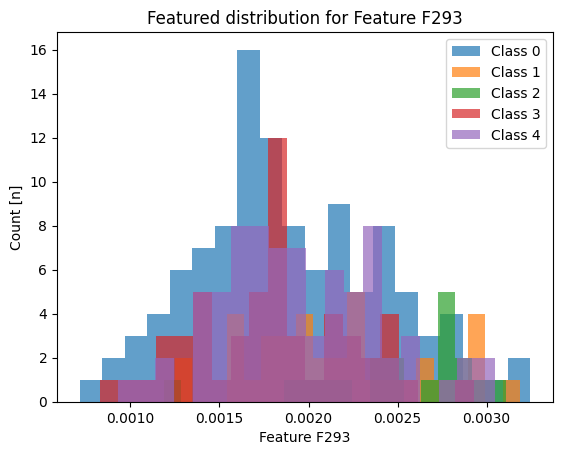

0.0002510216328898778 F294
0.0002510216328898778 F294


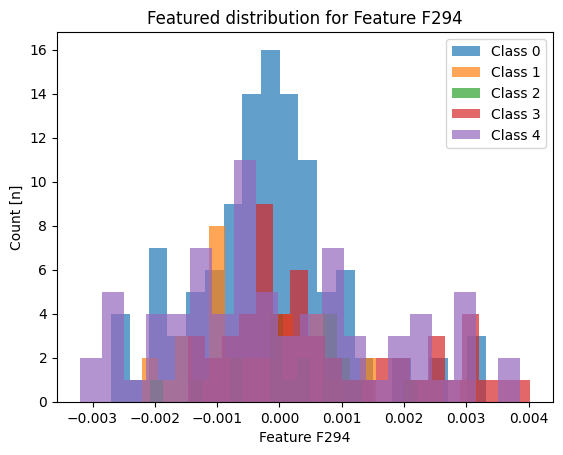

0.00022604390878049166 F296
0.0005467328635893916 F296
0.0003107512801377561 F296
0.00022604390878049166 F296
0.0005467328635893916 F296
0.0003107512801377561 F296


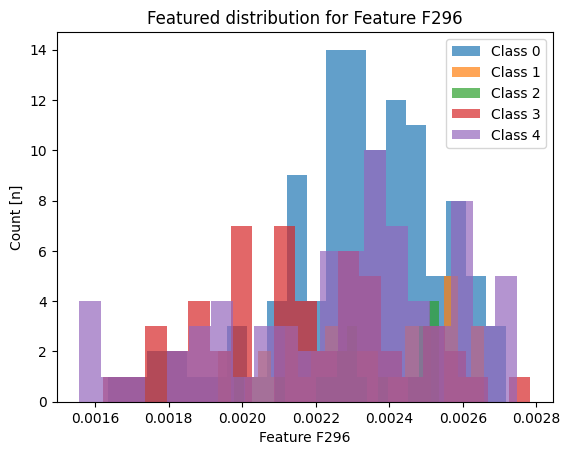

0.00010696975129890746 F297
5.365688908931158e-06 F297
0.00010696975129890746 F297
1.060956337265688e-06 F297
1.2850306370990698e-05 F297
5.365688908931158e-06 F297
5.359724986828681e-08 F297
4.5224674042314036e-07 F297
1.060956337265688e-06 F297
5.359724986828681e-08 F297
1.2850306370990698e-05 F297
4.5224674042314036e-07 F297


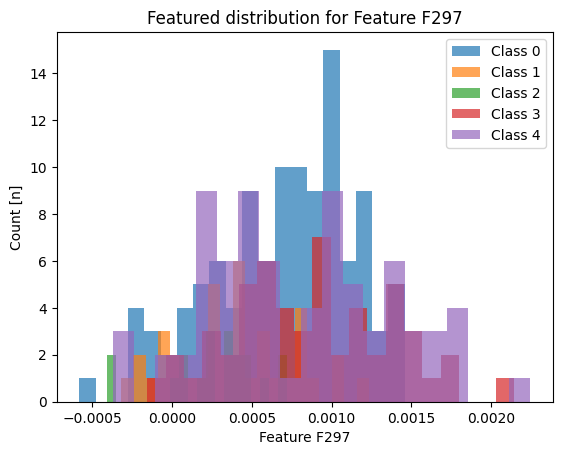

0.0009339844414614935 F300
0.0009339844414614935 F300


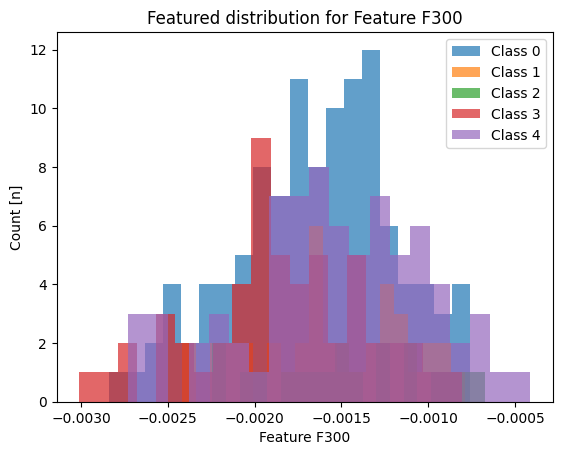

0.0003682495131814489 F301
0.00023360141701343602 F301
1.1315840467462888e-05 F301
0.0003682495131814489 F301
0.00023360141701343602 F301
1.1315840467462888e-05 F301


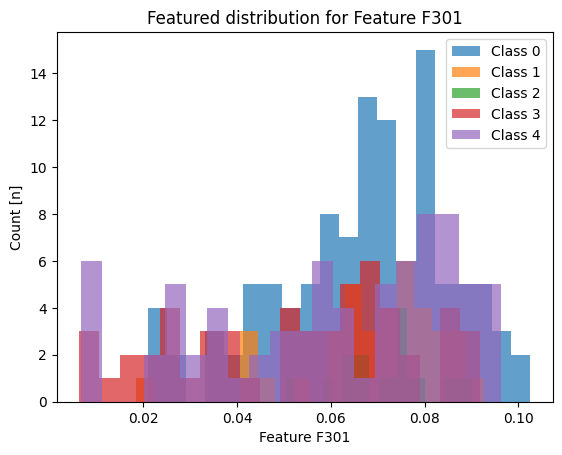

0.0008012655600270525 F302
0.0008012655600270525 F302
0.0001342669794237973 F302
0.0001342669794237973 F302


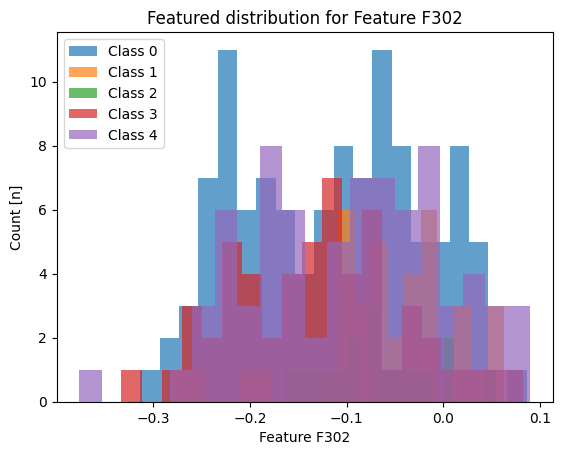

0.0003559589019374294 F305
0.0003559589019374294 F305
3.3482386701053986e-05 F305
3.3482386701053986e-05 F305


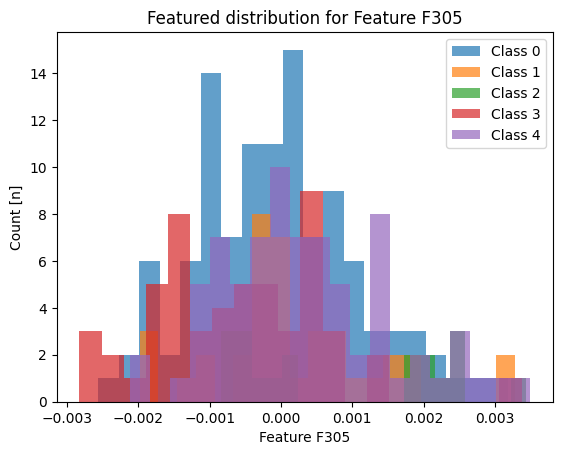

0.0007412374399331316 F307
0.0007412374399331316 F307


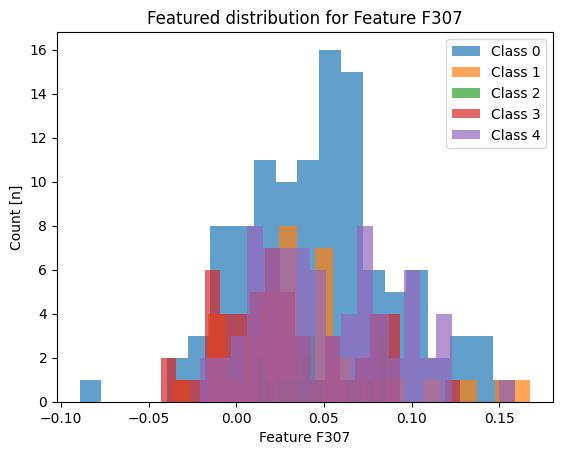

0.0005163377011253979 F311
0.0005163377011253979 F311
6.685445838577497e-05 F311
0.0004246306792098107 F311
0.0009372930369797301 F311
6.685445838577497e-05 F311
0.0009372930369797301 F311
0.0004246306792098107 F311


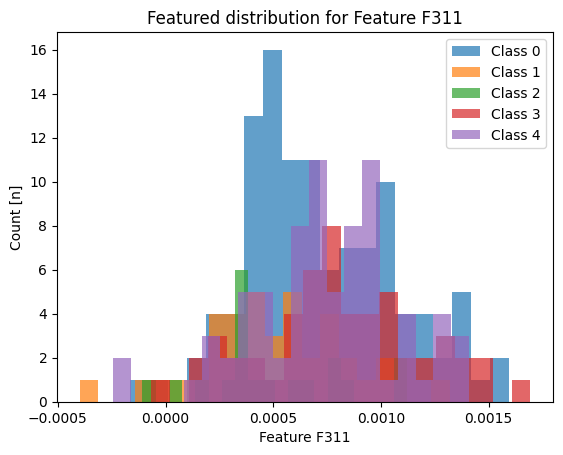

0.00017323914368533712 F312
0.00021449128420168286 F312
0.00017323914368533712 F312
1.3451347485466798e-06 F312
9.698312870537547e-07 F312
0.00021449128420168286 F312
2.0348340009813335e-06 F312
2.3574433135782414e-06 F312
1.3451347485466798e-06 F312
2.0348340009813335e-06 F312
9.698312870537547e-07 F312
2.3574433135782414e-06 F312


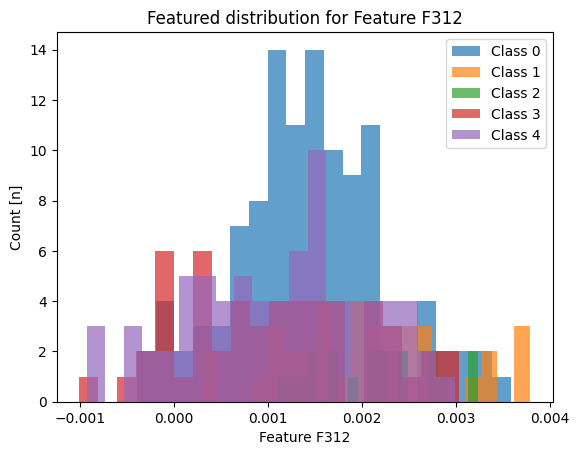

2.1559996562495267e-05 F315
2.1559996562495267e-05 F315
3.448511744246861e-05 F315
1.8156615105584731e-06 F315
3.448511744246861e-05 F315
1.8156615105584731e-06 F315


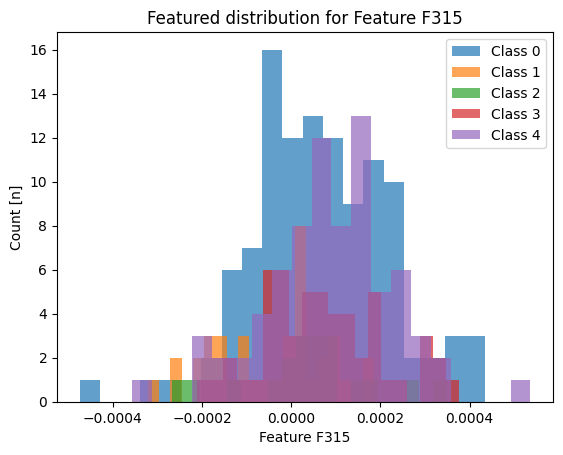

3.3727615549770654e-06 F317
3.3727615549770654e-06 F317
8.908492443328651e-07 F317
0.0008793090333527562 F317
8.908492443328651e-07 F317
0.0008793090333527562 F317


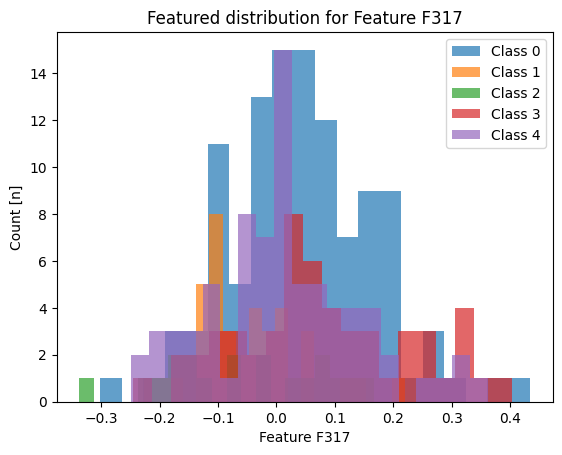

0.00027582509804499237 F318
0.00027582509804499237 F318


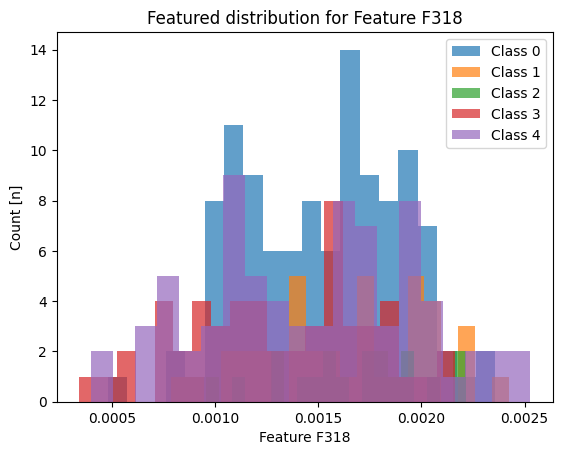

0.0008280372034808928 F320
0.00040189267597073966 F320
0.0008280372034808928 F320
0.00040189267597073966 F320


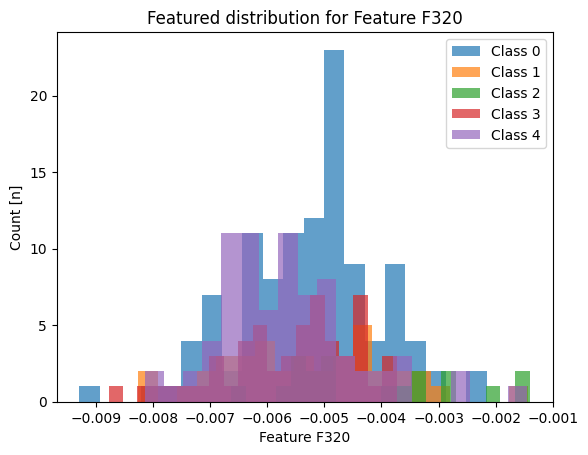

0.0004682763589683585 F322
5.094993973886138e-05 F322
0.0004682763589683585 F322
5.094993973886138e-05 F322


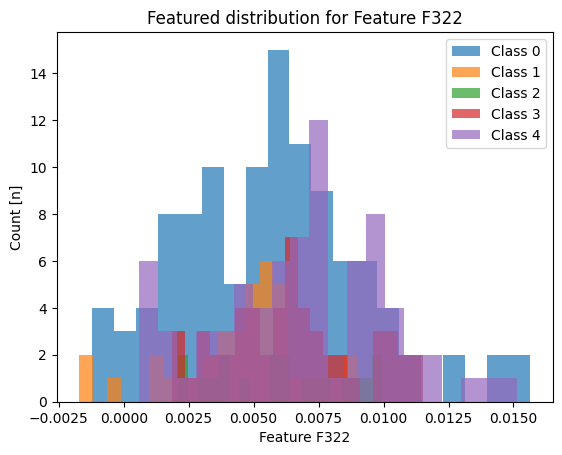

0.00034855378365094446 F328
0.00034855378365094446 F328
0.00010033153066328558 F328
6.108555153503508e-05 F328
2.206259835706662e-06 F328
0.00010033153066328558 F328
6.108555153503508e-05 F328
2.206259835706662e-06 F328


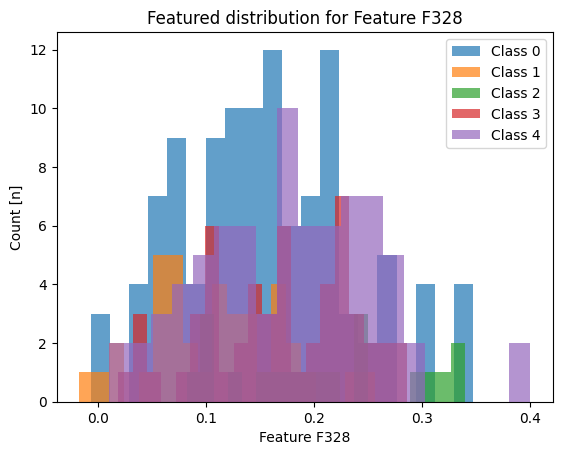

5.1341993228913566e-05 F329
5.1341993228913566e-05 F329
2.0022097940559864e-08 F329
8.812253958152239e-05 F329
2.680459737028605e-05 F329
2.0022097940559864e-08 F329
2.680459737028605e-05 F329
8.812253958152239e-05 F329


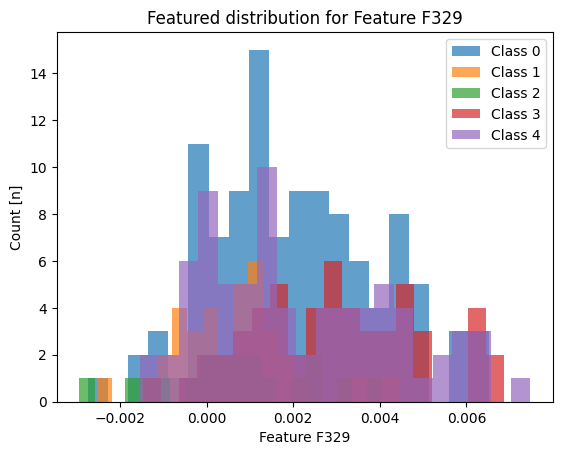

0.00040223330594654137 F330
0.0007051936092682062 F330
0.00040223330594654137 F330
0.0007051936092682062 F330


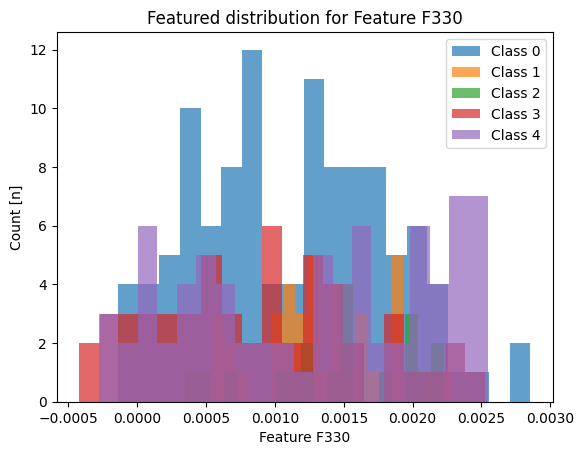

9.16623052055605e-05 F331
9.16623052055605e-05 F331


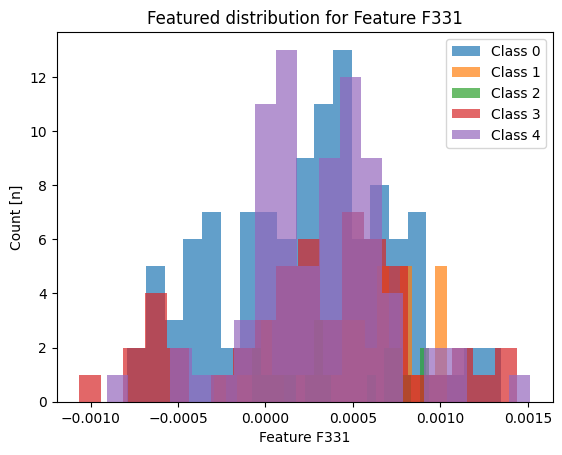

0.00036370157877330664 F332
0.00036370157877330664 F332


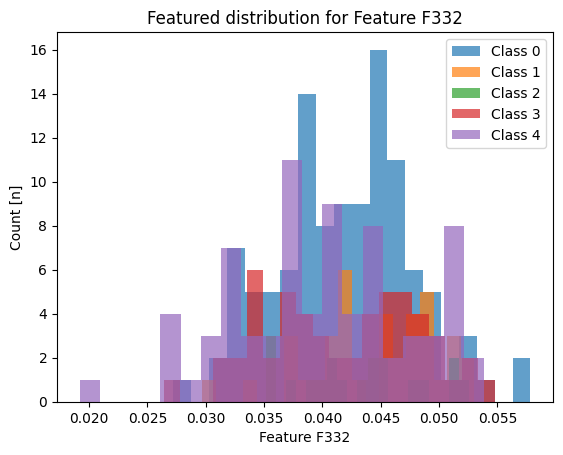

0.00034805122945423176 F333
0.00034805122945423176 F333


KeyboardInterrupt: 

In [45]:
from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(data, train["class"],
                                                        stratify=train["class"], 
                                                        test_size=0.3, random_state=0)
for f in featureNames:
    c1 = X_train.loc[list(y_train.loc[y_train==0].index)][f]
    c2 = X_train.loc[list(y_train.loc[y_train==1].index)][f]
    c3 = X_train.loc[list(y_train.loc[y_train==2].index)][f]
    c4 = X_train.loc[list(y_train.loc[y_train==3].index)][f]
    c5 = X_train.loc[list(y_train.loc[y_train==4].index)][f]
    
    useful = False
    for x in [c1, c2, c3, c4, c5]:
        for y in [c1, c2, c3, c4, c5]:
            t_check=stats.ttest_ind(x, y, equal_var=False)
            alpha=0.001
            if(t_check[1]<alpha):
                print(t_check[1], f)
                useful = True
    
    if useful:
        plt.hist(c1, label="Class 0", alpha = 0.7, bins=20)
        plt.hist(c2, label="Class 1", alpha = 0.7, bins=20)
        plt.hist(c3, label="Class 2", alpha = 0.7, bins=20)
        plt.hist(c4, label="Class 3", alpha = 0.7, bins=20)
        plt.hist(c5, label="Class 4", alpha = 0.7, bins=20)
        plt.xlabel("Feature " + f); plt.ylabel("Count [n]")
        plt.title("Featured distribution for Feature " + f)
        plt.legend()
        plt.show()


In [36]:
    c1 = X_train.loc[list(y_train.loc[y_train==0].index)][f]
    c2 = X_train.loc[list(y_train.loc[y_train==1].index)][f]
    c3 = X_train.loc[list(y_train.loc[y_train==2].index)][f]
    c4 = X_train.loc[list(y_train.loc[y_train==3].index)][f]
    c5 = X_train.loc[list(y_train.loc[y_train==4].index)][f]
    
    print(f)

F164


In [43]:
print(stats.ttest_ind(c1,c2))

t = (np.mean(c1)-np.mean(c2))/np.sqrt((np.var(c1)+np.var(c2))/len(c1))
print(stats.ttest_ind(c1, c2, equal_var=False))

Ttest_indResult(statistic=-2.768937419656128, pvalue=0.006348957992376464)
Ttest_indResult(statistic=-2.9667196069550004, pvalue=0.004064928381443403)
